<a href="https://colab.research.google.com/github/mannatkaurgithub/SynData/blob/main/SynData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**
Fraud detection models are an essential tool for companies in various industries to detect and prevent fraudulent activities such as credit card fraud or false claims in insurance.

These models have the objective to identify fraudulent transactions or activities by analyzing large amounts of data and detecting patterns that deviate from normal behavior.

However, , the fraud instances (the minority class) are by far less frequent than the non-fraudulent ones (the majority class). Because of this class imbalance and confidentiality clause, not enough data is present to train the model. Therefore, the model struggles to distinguish between the two classes and therefore is not properly capable of detecting fraud.

# **DATA PREPROCESSING**
We would be working with Kaggle dataset (Credit card fraud detection) which is publicly available.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:00<00:00, 175MB/s]
100% 66.0M/66.0M [00:00<00:00, 178MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
!pip install --force-reinstall --no-deps https://github.com/ceshine/ydata-synthetic/archive/master.zip

     \ 107.4 kB 1.1 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-synthetic: filename=ydata_synthetic-0.0.0-py2.py3-none-any.whl size=28722 sha256=d3460eb0d7d643ebe6ba7fb659b0b44074005a998fa6de1b1cffdc58e01cd370
  Stored in directory: /tmp/pip-ephem-wheel-cache-nhayj_8t/wheels/f1/13/9b/3b8879ef0d20911690d162440bd5b71f5324fb94d088e9fbe6
Successfully built ydata-synthetic


In [ ]:
!pip install -U pmlb tensorflow-privacy watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.5/405.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.7 MB/s eta

In [ ]:
%load_ext watermark
%watermark -p tensorflow,pandas -z -v -n -m -w

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

tensorflow: 2.15.0
pandas    : 1.5.3

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.120+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Watermark: 2.4.3



In [ ]:
import importlib
import sys

import pandas as pd
import numpy as np
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

from ydata_synthetic.synthesizers import WGAN_GP
from ydata_synthetic.preprocessing.credit_fraud import *

In [ ]:
data = pd.read_csv('creditcard.csv', index_col=[0])

In [ ]:
label_cols = [ i for i in data.columns if 'Class' in i ]
data_cols = [ i for i in data.columns if i not in label_cols ]

print('Dataset columns: {}'.format(", ".join(data_cols)))

Dataset columns: V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount


In [ ]:
data = transformations(data)

In [ ]:
train_data = data.loc[ data['Class']==1 ].copy()

In [ ]:
print("Dataset info: Number of records - {} Number of varibles - {}".format(train_data.shape[0], train_data.shape[1]))

Dataset info: Number of records - 492 Number of varibles - 30


In [ ]:
algorithm = cluster.KMeans
args, kwds = (), {'n_clusters':2, 'random_state':0}
labels = algorithm(*args, **kwds).fit_predict(train_data[ data_cols ])

print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )

fraud_w_classes = train_data.copy()
fraud_w_classes['Class'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   count
0    384
1    108


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
sss_1 = StratifiedShuffleSplit(test_size=0.4, random_state=42)
sss_2 = StratifiedShuffleSplit(test_size=0.5, random_state=42)
data = pd.read_csv('creditcard.csv', index_col=[0])[data_cols + ["Class"]]
#Before training the GAN do not forget to apply the required data transformations
#To ease here we've applied a PowerTransformation
data = transformations(data)
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
sampled_data = pd.concat([data[data.Class == 1], data[data.Class==0].sample(20000)], axis=0)
train_idx, test_idx = next(sss_1.split(sampled_data, sampled_data["Class"]))
X_train, X_test, y_train, y_test = sampled_data.iloc[train_idx][data_cols], sampled_data.iloc[test_idx][data_cols], sampled_data.iloc[train_idx]["Class"], sampled_data.iloc[test_idx]["Class"]
valid_idx, test_idx = next(sss_2.split(X_test, y_test))
X_valid, X_test, y_valid, y_test = X_test.iloc[valid_idx], X_test.iloc[test_idx], y_test.iloc[valid_idx], y_test.iloc[test_idx]
X_train.shape, X_test.shape, X_valid.shape, y_train.shape, y_test.shape, y_valid.shape

((12295, 29), (4099, 29), (4098, 29), (12295,), (4099,), (4098,))

In [ ]:
#Define the GAN and training parameters
noise_dim = 32
dim = 64
batch_size = 192

log_step = 100
epochs = 1200+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

gan_args = [batch_size, learning_rate, beta_1, beta_2, noise_dim, X_train.shape[1], dim]
train_args = ['', epochs, log_step]
train_samples = X_train[y_train==1].reset_index(drop=True)
train_samples.shape

(295, 29)

In [ ]:
#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = WGAN_GP(gan_args, n_critic=4)
# Only generate fraud data
synthesizer.train(train_samples, train_args)

  0%|          | 4/1201 [00:06<24:26,  1.22s/it]  

Iteration: 0 | disc_loss: 46.50120162963867 | gen_loss: -0.027190396562218666
Iteration: 1 | disc_loss: 24.378257751464844 | gen_loss: 0.0007001140620559454
Iteration: 2 | disc_loss: 16.059171676635742 | gen_loss: 0.007492891047149897
Iteration: 3 | disc_loss: 9.05204963684082 | gen_loss: 0.014763069339096546
Iteration: 4 | disc_loss: 6.269775867462158 | gen_loss: 0.019805526360869408


  1%|          | 11/1201 [00:06<06:04,  3.27it/s]

Iteration: 5 | disc_loss: 4.803416728973389 | gen_loss: 0.026349855586886406
Iteration: 6 | disc_loss: 3.533897638320923 | gen_loss: 0.02541474439203739
Iteration: 7 | disc_loss: 2.166443109512329 | gen_loss: 0.02746669203042984
Iteration: 8 | disc_loss: 1.4808543920516968 | gen_loss: 0.030703725293278694
Iteration: 9 | disc_loss: 0.8109647035598755 | gen_loss: 0.039315495640039444
Iteration: 10 | disc_loss: 0.42773884534835815 | gen_loss: 0.040244586765766144
Iteration: 11 | disc_loss: 0.12291625142097473 | gen_loss: 0.04550708457827568


  1%|▏         | 17/1201 [00:06<03:01,  6.53it/s]

Iteration: 12 | disc_loss: -0.0976516604423523 | gen_loss: 0.048906221985816956
Iteration: 13 | disc_loss: -0.32454735040664673 | gen_loss: 0.05337406322360039
Iteration: 14 | disc_loss: -0.4404999017715454 | gen_loss: 0.049550194293260574
Iteration: 15 | disc_loss: -0.6156198978424072 | gen_loss: 0.048806533217430115
Iteration: 16 | disc_loss: -0.7006855607032776 | gen_loss: 0.04833827540278435
Iteration: 17 | disc_loss: -0.7087745666503906 | gen_loss: 0.054773617535829544


  2%|▏         | 25/1201 [00:07<01:33, 12.61it/s]

Iteration: 18 | disc_loss: -0.7971163988113403 | gen_loss: 0.044261518865823746
Iteration: 19 | disc_loss: -0.9203855395317078 | gen_loss: 0.030301809310913086
Iteration: 20 | disc_loss: -0.8889893293380737 | gen_loss: 0.042743682861328125
Iteration: 21 | disc_loss: -0.8350300788879395 | gen_loss: 0.036454424262046814
Iteration: 22 | disc_loss: -0.9679745435714722 | gen_loss: 0.05371186137199402
Iteration: 23 | disc_loss: -0.9974746704101562 | gen_loss: 0.040797967463731766
Iteration: 24 | disc_loss: -1.0561137199401855 | gen_loss: 0.017441729083657265


  3%|▎         | 32/1201 [00:07<01:04, 18.03it/s]

Iteration: 25 | disc_loss: -0.9534268379211426 | gen_loss: 0.0532677061855793
Iteration: 26 | disc_loss: -1.0688471794128418 | gen_loss: 0.018493587151169777
Iteration: 27 | disc_loss: -1.0467629432678223 | gen_loss: 0.00955047644674778
Iteration: 28 | disc_loss: -1.046921968460083 | gen_loss: -0.03595244511961937
Iteration: 29 | disc_loss: -1.0250225067138672 | gen_loss: -0.006215693429112434
Iteration: 30 | disc_loss: -0.9376921653747559 | gen_loss: -0.057820629328489304
Iteration: 31 | disc_loss: -1.0101450681686401 | gen_loss: -0.055635448545217514


  3%|▎         | 38/1201 [00:07<00:52, 21.98it/s]

Iteration: 32 | disc_loss: -0.9923239946365356 | gen_loss: -0.04899733141064644
Iteration: 33 | disc_loss: -0.9375196695327759 | gen_loss: -0.08342482894659042
Iteration: 34 | disc_loss: -0.9492990374565125 | gen_loss: -0.05728951469063759
Iteration: 35 | disc_loss: -0.9155422449111938 | gen_loss: -0.08767015486955643
Iteration: 36 | disc_loss: -0.8971402049064636 | gen_loss: -0.0669388696551323
Iteration: 37 | disc_loss: -0.8382453918457031 | gen_loss: -0.08638507127761841
Iteration: 38 | disc_loss: -0.8127779364585876 | gen_loss: -0.05726360157132149


  4%|▎         | 45/1201 [00:07<00:44, 25.79it/s]

Iteration: 39 | disc_loss: -0.7951859831809998 | gen_loss: -0.11904898285865784
Iteration: 40 | disc_loss: -0.6779636144638062 | gen_loss: -0.037294600158929825
Iteration: 41 | disc_loss: -0.7431400418281555 | gen_loss: -0.01288966927677393
Iteration: 42 | disc_loss: -0.7273129820823669 | gen_loss: 0.00024070963263511658
Iteration: 43 | disc_loss: -0.6840685606002808 | gen_loss: 0.020603617653250694
Iteration: 44 | disc_loss: -0.7026228904724121 | gen_loss: 0.03825056552886963
Iteration: 45 | disc_loss: -0.6963492631912231 | gen_loss: 0.01580248959362507


  4%|▍         | 51/1201 [00:07<00:41, 27.63it/s]

Iteration: 46 | disc_loss: -0.7019078731536865 | gen_loss: 0.04318259283900261
Iteration: 47 | disc_loss: -0.6759072542190552 | gen_loss: 0.059604715555906296
Iteration: 48 | disc_loss: -0.7280899286270142 | gen_loss: 0.05667327344417572
Iteration: 49 | disc_loss: -0.7129077315330505 | gen_loss: 0.06888614594936371
Iteration: 50 | disc_loss: -0.6813597679138184 | gen_loss: 0.16033999621868134
Iteration: 51 | disc_loss: -0.6989586353302002 | gen_loss: 0.07870405167341232
Iteration: 52 | disc_loss: -0.7107453942298889 | gen_loss: 0.15427449345588684


  5%|▍         | 59/1201 [00:08<00:38, 29.62it/s]

Iteration: 53 | disc_loss: -0.6681318879127502 | gen_loss: 0.13126058876514435
Iteration: 54 | disc_loss: -0.6314982175827026 | gen_loss: 0.16125896573066711
Iteration: 55 | disc_loss: -0.629162609577179 | gen_loss: 0.13746774196624756
Iteration: 56 | disc_loss: -0.6679707169532776 | gen_loss: 0.06565436720848083
Iteration: 57 | disc_loss: -0.6941394805908203 | gen_loss: 0.1204843819141388
Iteration: 58 | disc_loss: -0.6969810724258423 | gen_loss: 0.12348709255456924
Iteration: 59 | disc_loss: -0.7084516286849976 | gen_loss: 0.1201569065451622


  5%|▌         | 63/1201 [00:08<00:38, 29.86it/s]

Iteration: 60 | disc_loss: -0.7000522017478943 | gen_loss: 0.12331870943307877
Iteration: 61 | disc_loss: -0.665965735912323 | gen_loss: 0.1390596479177475
Iteration: 62 | disc_loss: -0.6802711486816406 | gen_loss: 0.2633382976055145
Iteration: 63 | disc_loss: -0.6377975940704346 | gen_loss: 0.0579390712082386
Iteration: 64 | disc_loss: -0.7019315361976624 | gen_loss: 0.07877912372350693
Iteration: 65 | disc_loss: -0.720295786857605 | gen_loss: 0.08927219361066818


  6%|▌         | 70/1201 [00:08<00:39, 28.43it/s]

Iteration: 66 | disc_loss: -0.6962921619415283 | gen_loss: 0.16504409909248352
Iteration: 67 | disc_loss: -0.7471622228622437 | gen_loss: 0.07431437075138092
Iteration: 68 | disc_loss: -0.5431321859359741 | gen_loss: 0.16046565771102905
Iteration: 69 | disc_loss: -0.7048702836036682 | gen_loss: 0.10548633337020874
Iteration: 70 | disc_loss: -0.7000631093978882 | gen_loss: 0.08333320170640945
Iteration: 71 | disc_loss: -0.7281289100646973 | gen_loss: 0.04410905763506889


  6%|▋         | 76/1201 [00:08<00:39, 28.50it/s]

Iteration: 72 | disc_loss: -0.7066141963005066 | gen_loss: 0.11890725046396255
Iteration: 73 | disc_loss: -0.6507278680801392 | gen_loss: 0.08703089505434036
Iteration: 74 | disc_loss: -0.698453426361084 | gen_loss: 0.07744903117418289
Iteration: 75 | disc_loss: -0.6779161691665649 | gen_loss: 0.22718612849712372
Iteration: 76 | disc_loss: -0.707882821559906 | gen_loss: 0.11891362816095352
Iteration: 77 | disc_loss: -0.6396491527557373 | gen_loss: 0.13722391426563263


  7%|▋         | 84/1201 [00:09<00:37, 29.70it/s]

Iteration: 78 | disc_loss: -0.6761101484298706 | gen_loss: 0.11188822239637375
Iteration: 79 | disc_loss: -0.706560492515564 | gen_loss: 0.010897054336965084
Iteration: 80 | disc_loss: -0.6744558811187744 | gen_loss: 0.12305539846420288
Iteration: 81 | disc_loss: -0.6633824706077576 | gen_loss: 0.09147991985082626
Iteration: 82 | disc_loss: -0.6975424289703369 | gen_loss: 0.13742771744728088
Iteration: 83 | disc_loss: -0.7100456953048706 | gen_loss: 0.1318175494670868
Iteration: 84 | disc_loss: -0.7187238931655884 | gen_loss: 0.09670952707529068


  8%|▊         | 91/1201 [00:09<00:37, 29.51it/s]

Iteration: 85 | disc_loss: -0.6657134294509888 | gen_loss: 0.12403149157762527
Iteration: 86 | disc_loss: -0.6127460598945618 | gen_loss: 0.09722209721803665
Iteration: 87 | disc_loss: -0.6752130389213562 | gen_loss: -0.05558326467871666
Iteration: 88 | disc_loss: -0.6396806836128235 | gen_loss: 0.04228216037154198
Iteration: 89 | disc_loss: -0.6600552797317505 | gen_loss: 0.07065167278051376
Iteration: 90 | disc_loss: -0.6872053742408752 | gen_loss: -0.041204776614904404
Iteration: 91 | disc_loss: -0.6657175421714783 | gen_loss: 0.11576255410909653


  8%|▊         | 98/1201 [00:09<00:37, 29.09it/s]

Iteration: 92 | disc_loss: -0.6693941950798035 | gen_loss: 0.06955914944410324
Iteration: 93 | disc_loss: -0.6835435032844543 | gen_loss: 0.3206234872341156
Iteration: 94 | disc_loss: -0.6813711524009705 | gen_loss: 0.20240418612957
Iteration: 95 | disc_loss: -0.6232210397720337 | gen_loss: 0.17842619121074677
Iteration: 96 | disc_loss: -0.6637161374092102 | gen_loss: 0.14731091260910034
Iteration: 97 | disc_loss: -0.6429986953735352 | gen_loss: -0.013214264996349812


  9%|▊         | 104/1201 [00:09<00:39, 27.44it/s]

Iteration: 98 | disc_loss: -0.6094315648078918 | gen_loss: 0.03005639649927616
Iteration: 99 | disc_loss: -0.6665341258049011 | gen_loss: -0.04125339910387993
Iteration: 100 | disc_loss: -0.6274177432060242 | gen_loss: 0.07460949569940567
Iteration: 101 | disc_loss: -0.6762220859527588 | gen_loss: 0.021109456196427345
Iteration: 102 | disc_loss: -0.629610002040863 | gen_loss: 0.13308198750019073
Iteration: 103 | disc_loss: -0.6610872149467468 | gen_loss: 0.2720172703266144


  9%|▉         | 111/1201 [00:10<00:37, 29.41it/s]

Iteration: 104 | disc_loss: -0.6629818677902222 | gen_loss: 0.09330672025680542
Iteration: 105 | disc_loss: -0.6783849000930786 | gen_loss: -0.0787675753235817
Iteration: 106 | disc_loss: -0.6262212991714478 | gen_loss: 0.07822171598672867
Iteration: 107 | disc_loss: -0.6752555966377258 | gen_loss: 0.026424169540405273
Iteration: 108 | disc_loss: -0.6999329328536987 | gen_loss: -0.007400350645184517
Iteration: 109 | disc_loss: -0.6741726994514465 | gen_loss: 0.12366747111082077
Iteration: 110 | disc_loss: -0.663192093372345 | gen_loss: 0.103080153465271


 10%|▉         | 115/1201 [00:10<00:36, 30.07it/s]

Iteration: 111 | disc_loss: -0.6626120805740356 | gen_loss: 0.11296846717596054
Iteration: 112 | disc_loss: -0.6743998527526855 | gen_loss: 0.07116585969924927
Iteration: 113 | disc_loss: -0.6363682150840759 | gen_loss: 0.1751352995634079
Iteration: 114 | disc_loss: -0.6717469692230225 | gen_loss: 0.2494366616010666
Iteration: 115 | disc_loss: -0.6538203954696655 | gen_loss: 0.11601153016090393
Iteration: 116 | disc_loss: -0.5865221619606018 | gen_loss: 0.17148326337337494
Iteration: 117 | disc_loss: -0.6490409970283508 | gen_loss: 0.16402404010295868


 10%|█         | 123/1201 [00:10<00:36, 29.56it/s]

Iteration: 118 | disc_loss: -0.6535247564315796 | gen_loss: 0.15515965223312378
Iteration: 119 | disc_loss: -0.6514357924461365 | gen_loss: 0.16524207592010498
Iteration: 120 | disc_loss: -0.6553343534469604 | gen_loss: -0.06347634643316269
Iteration: 121 | disc_loss: -0.6171628832817078 | gen_loss: 0.16166983544826508
Iteration: 122 | disc_loss: -0.6502308249473572 | gen_loss: 0.0034816141705960035
Iteration: 123 | disc_loss: -0.6568731069564819 | gen_loss: 0.08057388663291931


 11%|█         | 130/1201 [00:10<00:35, 30.24it/s]

Iteration: 124 | disc_loss: -0.6125235557556152 | gen_loss: 0.1618705838918686
Iteration: 125 | disc_loss: -0.6276749968528748 | gen_loss: 0.0802903100848198
Iteration: 126 | disc_loss: -0.603785514831543 | gen_loss: 0.02072976343333721
Iteration: 127 | disc_loss: -0.5719794034957886 | gen_loss: 0.07414766401052475
Iteration: 128 | disc_loss: -0.6578071713447571 | gen_loss: -0.004196390509605408
Iteration: 129 | disc_loss: -0.6409174799919128 | gen_loss: 0.00011996800458291546
Iteration: 130 | disc_loss: -0.5830388069152832 | gen_loss: 0.11597856134176254


 11%|█▏        | 137/1201 [00:10<00:36, 29.44it/s]

Iteration: 131 | disc_loss: -0.6169042587280273 | gen_loss: -0.002674594521522522
Iteration: 132 | disc_loss: -0.6201287508010864 | gen_loss: -0.07660236954689026
Iteration: 133 | disc_loss: -0.5642322301864624 | gen_loss: 0.047908201813697815
Iteration: 134 | disc_loss: -0.596871554851532 | gen_loss: 0.08473554998636246
Iteration: 135 | disc_loss: -0.5644251108169556 | gen_loss: 0.016652099788188934
Iteration: 136 | disc_loss: -0.6030964255332947 | gen_loss: -0.02432926557958126


 12%|█▏        | 141/1201 [00:11<00:35, 30.03it/s]

Iteration: 137 | disc_loss: -0.619515597820282 | gen_loss: -0.07075183838605881
Iteration: 138 | disc_loss: -0.6027283668518066 | gen_loss: -0.18765218555927277
Iteration: 139 | disc_loss: -0.5614583492279053 | gen_loss: 0.08178213983774185
Iteration: 140 | disc_loss: -0.5744774341583252 | gen_loss: 0.05019824579358101
Iteration: 141 | disc_loss: -0.6126776337623596 | gen_loss: 0.02217254973948002
Iteration: 142 | disc_loss: -0.582714319229126 | gen_loss: 0.015758683905005455
Iteration: 143 | disc_loss: -0.5749265551567078 | gen_loss: -0.09834619611501694


 12%|█▏        | 149/1201 [00:11<00:34, 30.56it/s]

Iteration: 144 | disc_loss: -0.5377628803253174 | gen_loss: -0.10011857002973557
Iteration: 145 | disc_loss: -0.580621063709259 | gen_loss: -0.13798804581165314
Iteration: 146 | disc_loss: -0.5156145095825195 | gen_loss: -0.13233453035354614
Iteration: 147 | disc_loss: -0.5750804543495178 | gen_loss: -0.06513497978448868
Iteration: 148 | disc_loss: -0.5355150699615479 | gen_loss: -0.043853044509887695
Iteration: 149 | disc_loss: -0.5649477243423462 | gen_loss: -0.057597529143095016
Iteration: 150 | disc_loss: -0.5879759192466736 | gen_loss: -0.011445327661931515


 13%|█▎        | 157/1201 [00:11<00:36, 28.92it/s]

Iteration: 151 | disc_loss: -0.5603135824203491 | gen_loss: -0.02489328570663929
Iteration: 152 | disc_loss: -0.5274391174316406 | gen_loss: -0.10991094261407852
Iteration: 153 | disc_loss: -0.521353006362915 | gen_loss: 0.0162274818867445
Iteration: 154 | disc_loss: -0.5316370725631714 | gen_loss: -0.1938292384147644
Iteration: 155 | disc_loss: -0.49555668234825134 | gen_loss: -0.018284348770976067
Iteration: 156 | disc_loss: -0.5233089327812195 | gen_loss: 0.06186452507972717


 14%|█▎        | 163/1201 [00:11<00:35, 29.10it/s]

Iteration: 157 | disc_loss: -0.5103495121002197 | gen_loss: -0.04505010321736336
Iteration: 158 | disc_loss: -0.4802013337612152 | gen_loss: 0.020425943657755852
Iteration: 159 | disc_loss: -0.5048088431358337 | gen_loss: -0.07767180353403091
Iteration: 160 | disc_loss: -0.5083646774291992 | gen_loss: -0.10543298721313477
Iteration: 161 | disc_loss: -0.5145425796508789 | gen_loss: -0.12467081099748611
Iteration: 162 | disc_loss: -0.5462585091590881 | gen_loss: 0.014901177026331425
Iteration: 163 | disc_loss: -0.5153401494026184 | gen_loss: 0.061746012419462204


 14%|█▍        | 170/1201 [00:12<00:34, 29.68it/s]

Iteration: 164 | disc_loss: -0.5183327794075012 | gen_loss: 0.04407370090484619
Iteration: 165 | disc_loss: -0.48251959681510925 | gen_loss: -0.015351626090705395
Iteration: 166 | disc_loss: -0.5337870717048645 | gen_loss: -0.01483138557523489
Iteration: 167 | disc_loss: -0.5404600501060486 | gen_loss: -0.06068086624145508
Iteration: 168 | disc_loss: -0.5473410487174988 | gen_loss: -0.12023357301950455
Iteration: 169 | disc_loss: -0.5543199181556702 | gen_loss: -0.17950749397277832
Iteration: 170 | disc_loss: -0.45595210790634155 | gen_loss: -0.07448812574148178


 15%|█▍        | 177/1201 [00:12<00:34, 29.96it/s]

Iteration: 171 | disc_loss: -0.5113655924797058 | gen_loss: 0.004978108685463667
Iteration: 172 | disc_loss: -0.5345671772956848 | gen_loss: 0.18289022147655487
Iteration: 173 | disc_loss: -0.5261234045028687 | gen_loss: 0.188581645488739
Iteration: 174 | disc_loss: -0.5010133981704712 | gen_loss: 0.02897031046450138
Iteration: 175 | disc_loss: -0.514981210231781 | gen_loss: -0.09020862728357315
Iteration: 176 | disc_loss: -0.511276125907898 | gen_loss: -0.13651424646377563
Iteration: 177 | disc_loss: -0.5312942266464233 | gen_loss: -0.07821551710367203


 15%|█▌        | 184/1201 [00:12<00:34, 29.22it/s]

Iteration: 178 | disc_loss: -0.5379431247711182 | gen_loss: 0.10306204110383987
Iteration: 179 | disc_loss: -0.5181971192359924 | gen_loss: 0.15592622756958008
Iteration: 180 | disc_loss: -0.5000783801078796 | gen_loss: 0.03602547571063042
Iteration: 181 | disc_loss: -0.4954560399055481 | gen_loss: -0.03137435019016266
Iteration: 182 | disc_loss: -0.5602136850357056 | gen_loss: -0.07708905637264252
Iteration: 183 | disc_loss: -0.5172816514968872 | gen_loss: 0.033186640590429306


 16%|█▌        | 188/1201 [00:12<00:34, 29.70it/s]

Iteration: 184 | disc_loss: -0.4503153860569 | gen_loss: -0.04283895716071129
Iteration: 185 | disc_loss: -0.5244141817092896 | gen_loss: 0.02702593058347702
Iteration: 186 | disc_loss: -0.5357699990272522 | gen_loss: 0.07858075946569443
Iteration: 187 | disc_loss: -0.49987849593162537 | gen_loss: 0.09599631279706955
Iteration: 188 | disc_loss: -0.5045568943023682 | gen_loss: -0.02254955656826496
Iteration: 189 | disc_loss: -0.47957226634025574 | gen_loss: -0.0391807034611702
Iteration: 190 | disc_loss: -0.49237310886383057 | gen_loss: -0.07192058116197586


 16%|█▌        | 195/1201 [00:12<00:34, 29.31it/s]

Iteration: 191 | disc_loss: -0.49151304364204407 | gen_loss: 0.09449154138565063
Iteration: 192 | disc_loss: -0.5091811418533325 | gen_loss: 0.0434681661427021
Iteration: 193 | disc_loss: -0.4962676465511322 | gen_loss: 0.08199445903301239
Iteration: 194 | disc_loss: -0.5001359581947327 | gen_loss: 0.00507211871445179
Iteration: 195 | disc_loss: -0.5290475487709045 | gen_loss: -0.059560272842645645
Iteration: 196 | disc_loss: -0.5526880621910095 | gen_loss: -0.030125154182314873


 17%|█▋        | 201/1201 [00:13<00:36, 27.12it/s]

Iteration: 197 | disc_loss: -0.5198107957839966 | gen_loss: -0.15406382083892822
Iteration: 198 | disc_loss: -0.47690731287002563 | gen_loss: 0.01810481958091259
Iteration: 199 | disc_loss: -0.5143777132034302 | gen_loss: 0.10344920307397842
Iteration: 200 | disc_loss: -0.4906004071235657 | gen_loss: 0.108723483979702
Iteration: 201 | disc_loss: -0.5205782055854797 | gen_loss: 0.20214076340198517
Iteration: 202 | disc_loss: -0.4916939437389374 | gen_loss: 0.026993250474333763


 17%|█▋        | 209/1201 [00:13<00:34, 28.94it/s]

Iteration: 203 | disc_loss: -0.28235334157943726 | gen_loss: 0.03992803767323494
Iteration: 204 | disc_loss: -0.5179088115692139 | gen_loss: -0.04133158177137375
Iteration: 205 | disc_loss: -0.5267260074615479 | gen_loss: -0.02507857419550419
Iteration: 206 | disc_loss: -0.515567421913147 | gen_loss: -0.10727190226316452
Iteration: 207 | disc_loss: -0.48830705881118774 | gen_loss: 0.06741046905517578
Iteration: 208 | disc_loss: -0.5121480822563171 | gen_loss: 0.12752175331115723
Iteration: 209 | disc_loss: -0.48459795117378235 | gen_loss: 0.1898149698972702


 18%|█▊        | 215/1201 [00:13<00:35, 28.05it/s]

Iteration: 210 | disc_loss: -0.5304920673370361 | gen_loss: 0.10363781452178955
Iteration: 211 | disc_loss: -0.49116751551628113 | gen_loss: 0.018491918221116066
Iteration: 212 | disc_loss: -0.4900501072406769 | gen_loss: 0.05659724399447441
Iteration: 213 | disc_loss: -0.5403259992599487 | gen_loss: -0.01542721688747406
Iteration: 214 | disc_loss: -0.4712896943092346 | gen_loss: 0.04680319130420685
Iteration: 215 | disc_loss: -0.49399101734161377 | gen_loss: 0.03975522890686989


 18%|█▊        | 221/1201 [00:13<00:34, 28.33it/s]

Iteration: 216 | disc_loss: -0.5191004276275635 | gen_loss: -0.00664815679192543
Iteration: 217 | disc_loss: -0.5124017000198364 | gen_loss: 0.0964052751660347
Iteration: 218 | disc_loss: -0.5119870901107788 | gen_loss: 0.06966788321733475
Iteration: 219 | disc_loss: -0.47848477959632874 | gen_loss: 0.16164205968379974
Iteration: 220 | disc_loss: -0.5109131932258606 | gen_loss: 0.046974655240774155
Iteration: 221 | disc_loss: -0.511391818523407 | gen_loss: -0.030338356271386147


 19%|█▉        | 228/1201 [00:14<00:32, 29.77it/s]

Iteration: 222 | disc_loss: -0.4970340132713318 | gen_loss: 0.07792089879512787
Iteration: 223 | disc_loss: -0.5133854150772095 | gen_loss: 0.07983497530221939
Iteration: 224 | disc_loss: -0.45590782165527344 | gen_loss: 0.14791087806224823
Iteration: 225 | disc_loss: -0.4956895709037781 | gen_loss: 0.008558405563235283
Iteration: 226 | disc_loss: -0.48847195506095886 | gen_loss: 0.06034064292907715
Iteration: 227 | disc_loss: -0.5099932551383972 | gen_loss: -0.014279169030487537
Iteration: 228 | disc_loss: -0.5232726335525513 | gen_loss: 0.06166223809123039


 20%|█▉        | 236/1201 [00:14<00:32, 29.92it/s]

Iteration: 229 | disc_loss: -0.5348847508430481 | gen_loss: -0.00026962533593177795
Iteration: 230 | disc_loss: -0.5005433559417725 | gen_loss: 0.20291884243488312
Iteration: 231 | disc_loss: -0.49854952096939087 | gen_loss: 0.03522726520895958
Iteration: 232 | disc_loss: -0.5250535607337952 | gen_loss: 0.051097720861434937
Iteration: 233 | disc_loss: -0.501712441444397 | gen_loss: 0.04909738898277283
Iteration: 234 | disc_loss: -0.5317112803459167 | gen_loss: 0.0837940201163292
Iteration: 235 | disc_loss: -0.5027419328689575 | gen_loss: 0.03302042558789253


 20%|██        | 243/1201 [00:14<00:31, 30.19it/s]

Iteration: 236 | disc_loss: -0.4510098695755005 | gen_loss: 0.04043949022889137
Iteration: 237 | disc_loss: -0.5080768465995789 | gen_loss: 0.03617837652564049
Iteration: 238 | disc_loss: -0.4451032876968384 | gen_loss: 0.01166508812457323
Iteration: 239 | disc_loss: -0.5271437764167786 | gen_loss: 0.08504227548837662
Iteration: 240 | disc_loss: -0.5237836837768555 | gen_loss: -0.0019297230755910277
Iteration: 241 | disc_loss: -0.5373825430870056 | gen_loss: 0.08745041489601135
Iteration: 242 | disc_loss: -0.5193986892700195 | gen_loss: 0.041642483323812485


 21%|██        | 250/1201 [00:14<00:32, 29.59it/s]

Iteration: 243 | disc_loss: -0.5199845433235168 | gen_loss: -0.043504778295755386
Iteration: 244 | disc_loss: -0.533970832824707 | gen_loss: 0.17924277484416962
Iteration: 245 | disc_loss: -0.5061931014060974 | gen_loss: 0.1426345854997635
Iteration: 246 | disc_loss: -0.5443109273910522 | gen_loss: 0.16570797562599182
Iteration: 247 | disc_loss: -0.5153368711471558 | gen_loss: -0.0008320212364196777
Iteration: 248 | disc_loss: -0.5161001086235046 | gen_loss: -0.014813538640737534
Iteration: 249 | disc_loss: -0.47714707255363464 | gen_loss: -0.06236237287521362


 21%|██▏       | 256/1201 [00:15<00:32, 29.19it/s]

Iteration: 250 | disc_loss: -0.520905613899231 | gen_loss: -0.06656385213136673
Iteration: 251 | disc_loss: -0.5088385343551636 | gen_loss: 0.05870905518531799
Iteration: 252 | disc_loss: -0.5306473970413208 | gen_loss: 0.1367771029472351
Iteration: 253 | disc_loss: -0.5094079375267029 | gen_loss: 0.2149505615234375
Iteration: 254 | disc_loss: -0.49095618724823 | gen_loss: 0.008584343828260899
Iteration: 255 | disc_loss: -0.47215113043785095 | gen_loss: -0.050188761204481125


 22%|██▏       | 260/1201 [00:15<00:31, 29.99it/s]

Iteration: 256 | disc_loss: -0.49836158752441406 | gen_loss: -0.05028155818581581
Iteration: 257 | disc_loss: -0.48777562379837036 | gen_loss: 0.038546185940504074
Iteration: 258 | disc_loss: -0.4692629277706146 | gen_loss: 0.09719523787498474
Iteration: 259 | disc_loss: -0.5121299028396606 | gen_loss: 0.04762279987335205
Iteration: 260 | disc_loss: -0.5186656713485718 | gen_loss: 0.04420432448387146
Iteration: 261 | disc_loss: -0.5075744986534119 | gen_loss: -0.0033063709270209074
Iteration: 262 | disc_loss: -0.5191015601158142 | gen_loss: 0.17307205498218536


 22%|██▏       | 268/1201 [00:15<00:34, 26.94it/s]

Iteration: 263 | disc_loss: -0.49553048610687256 | gen_loss: 0.11893761157989502
Iteration: 264 | disc_loss: -0.5045142769813538 | gen_loss: 0.05878352001309395
Iteration: 265 | disc_loss: -0.4397079646587372 | gen_loss: 0.02340894192457199
Iteration: 266 | disc_loss: -0.4875110685825348 | gen_loss: 0.06646331399679184
Iteration: 267 | disc_loss: -0.4908520579338074 | gen_loss: -0.025558317080140114


 23%|██▎       | 271/1201 [00:15<00:38, 24.29it/s]

Iteration: 268 | disc_loss: -0.47185850143432617 | gen_loss: 0.09350999444723129
Iteration: 269 | disc_loss: -0.48016226291656494 | gen_loss: 0.1326131820678711
Iteration: 270 | disc_loss: -0.5279034376144409 | gen_loss: 0.008436188101768494
Iteration: 271 | disc_loss: -0.4244439899921417 | gen_loss: 0.0862106904387474


 23%|██▎       | 277/1201 [00:15<00:42, 21.77it/s]

Iteration: 272 | disc_loss: -0.42417824268341064 | gen_loss: 0.12187850475311279
Iteration: 273 | disc_loss: -0.4700177311897278 | gen_loss: 0.032152604311704636
Iteration: 274 | disc_loss: -0.33962464332580566 | gen_loss: 0.04428647831082344
Iteration: 275 | disc_loss: -0.4349750876426697 | gen_loss: 0.028784552589058876
Iteration: 276 | disc_loss: -0.4074852168560028 | gen_loss: 0.036888618022203445


 23%|██▎       | 280/1201 [00:16<00:44, 20.71it/s]

Iteration: 277 | disc_loss: -0.43454891443252563 | gen_loss: 0.08798222988843918
Iteration: 278 | disc_loss: -0.335515558719635 | gen_loss: 0.1303377002477646
Iteration: 279 | disc_loss: -0.48908111453056335 | gen_loss: 0.09195701032876968
Iteration: 280 | disc_loss: -0.4415779411792755 | gen_loss: 0.05796477571129799


 24%|██▎       | 285/1201 [00:16<00:47, 19.22it/s]

Iteration: 281 | disc_loss: -0.4849637448787689 | gen_loss: 0.08883059024810791
Iteration: 282 | disc_loss: -0.49410930275917053 | gen_loss: -0.05261273309588432
Iteration: 283 | disc_loss: -0.4586184620857239 | gen_loss: 0.04043428972363472
Iteration: 284 | disc_loss: -0.48255619406700134 | gen_loss: 0.00405974080786109


 24%|██▍       | 289/1201 [00:16<00:48, 18.95it/s]

Iteration: 285 | disc_loss: -0.4132857918739319 | gen_loss: 0.033640068024396896
Iteration: 286 | disc_loss: -0.46459341049194336 | gen_loss: 0.04389146342873573
Iteration: 287 | disc_loss: -0.47965776920318604 | gen_loss: 0.09707608073949814
Iteration: 288 | disc_loss: -0.46924689412117004 | gen_loss: 0.1269073784351349


 24%|██▍       | 293/1201 [00:16<00:49, 18.39it/s]

Iteration: 289 | disc_loss: -0.4478774666786194 | gen_loss: 0.12850873172283173
Iteration: 290 | disc_loss: -0.4563833475112915 | gen_loss: 0.06998106837272644
Iteration: 291 | disc_loss: -0.39890074729919434 | gen_loss: 0.10184412449598312
Iteration: 292 | disc_loss: -0.41709843277931213 | gen_loss: 0.06660816073417664


 25%|██▍       | 298/1201 [00:17<00:48, 18.74it/s]

Iteration: 293 | disc_loss: -0.45782044529914856 | gen_loss: 0.04374617710709572
Iteration: 294 | disc_loss: -0.41887959837913513 | gen_loss: 0.131110280752182
Iteration: 295 | disc_loss: -0.4526737928390503 | gen_loss: 0.1955399066209793
Iteration: 296 | disc_loss: -0.42386069893836975 | gen_loss: 0.13954411447048187
Iteration: 297 | disc_loss: -0.4452148973941803 | gen_loss: 0.09677059203386307


 25%|██▌       | 302/1201 [00:17<00:50, 17.86it/s]

Iteration: 298 | disc_loss: -0.33800560235977173 | gen_loss: 0.13980495929718018
Iteration: 299 | disc_loss: -0.45068657398223877 | gen_loss: 0.10181913524866104
Iteration: 300 | disc_loss: -0.46881750226020813 | gen_loss: 0.02703930251300335
Iteration: 301 | disc_loss: -0.4306340217590332 | gen_loss: 0.12269074469804764


 25%|██▌       | 306/1201 [00:17<00:48, 18.64it/s]

Iteration: 302 | disc_loss: -0.47121667861938477 | gen_loss: 0.061190590262413025
Iteration: 303 | disc_loss: -0.4663463830947876 | gen_loss: 0.0881994366645813
Iteration: 304 | disc_loss: -0.38301825523376465 | gen_loss: 0.1705498844385147
Iteration: 305 | disc_loss: -0.4899156093597412 | gen_loss: 0.0501570962369442


 26%|██▌       | 310/1201 [00:17<00:47, 18.96it/s]

Iteration: 306 | disc_loss: -0.3781889081001282 | gen_loss: 0.05283735319972038
Iteration: 307 | disc_loss: -0.47363850474357605 | gen_loss: 0.1212625578045845
Iteration: 308 | disc_loss: -0.45487505197525024 | gen_loss: 0.13432615995407104
Iteration: 309 | disc_loss: -0.45147714018821716 | gen_loss: 0.1688808649778366


 26%|██▌       | 315/1201 [00:17<00:45, 19.27it/s]

Iteration: 310 | disc_loss: -0.42821431159973145 | gen_loss: 0.1444453001022339
Iteration: 311 | disc_loss: -0.44731229543685913 | gen_loss: 0.08215246349573135
Iteration: 312 | disc_loss: -0.4762364327907562 | gen_loss: 0.08791208267211914
Iteration: 313 | disc_loss: -0.45508402585983276 | gen_loss: 0.027735212817788124
Iteration: 314 | disc_loss: -0.4512997269630432 | gen_loss: -0.02971719391644001


 27%|██▋       | 319/1201 [00:18<00:46, 18.89it/s]

Iteration: 315 | disc_loss: -0.46048828959465027 | gen_loss: 0.10768850892782211
Iteration: 316 | disc_loss: -0.42829859256744385 | gen_loss: 0.058589667081832886
Iteration: 317 | disc_loss: -0.4550178647041321 | gen_loss: 0.12607456743717194
Iteration: 318 | disc_loss: -0.42308297753334045 | gen_loss: 0.06169688701629639


 27%|██▋       | 323/1201 [00:18<00:45, 19.13it/s]

Iteration: 319 | disc_loss: -0.43023166060447693 | gen_loss: 0.07915175706148148
Iteration: 320 | disc_loss: -0.4724259674549103 | gen_loss: 0.14422564208507538
Iteration: 321 | disc_loss: -0.47675490379333496 | gen_loss: 0.1480700820684433
Iteration: 322 | disc_loss: -0.41989371180534363 | gen_loss: 0.15838001668453217


 27%|██▋       | 327/1201 [00:18<00:46, 18.63it/s]

Iteration: 323 | disc_loss: -0.4164717197418213 | gen_loss: 0.10369837284088135
Iteration: 324 | disc_loss: -0.45779740810394287 | gen_loss: 0.08393138647079468
Iteration: 325 | disc_loss: -0.4229862093925476 | gen_loss: 0.0760468915104866
Iteration: 326 | disc_loss: -0.45171594619750977 | gen_loss: -0.01508752629160881


 28%|██▊       | 331/1201 [00:18<00:47, 18.45it/s]

Iteration: 327 | disc_loss: -0.4234912097454071 | gen_loss: 0.024623440578579903
Iteration: 328 | disc_loss: -0.4205920696258545 | gen_loss: 0.2099938839673996
Iteration: 329 | disc_loss: -0.44525381922721863 | gen_loss: 0.287195086479187
Iteration: 330 | disc_loss: -0.42526975274086 | gen_loss: 0.1746860295534134


 28%|██▊       | 335/1201 [00:19<00:47, 18.31it/s]

Iteration: 331 | disc_loss: -0.44279155135154724 | gen_loss: 0.09048866480588913
Iteration: 332 | disc_loss: -0.43413180112838745 | gen_loss: 0.04908784106373787
Iteration: 333 | disc_loss: -0.458700031042099 | gen_loss: 0.06767389923334122
Iteration: 334 | disc_loss: -0.47039639949798584 | gen_loss: 0.039297763258218765


 28%|██▊       | 339/1201 [00:19<00:45, 18.78it/s]

Iteration: 335 | disc_loss: -0.44978153705596924 | gen_loss: 0.0520777590572834
Iteration: 336 | disc_loss: -0.4510294497013092 | gen_loss: 0.08434296399354935
Iteration: 337 | disc_loss: -0.4253723919391632 | gen_loss: 0.0832962915301323
Iteration: 338 | disc_loss: -0.4438955783843994 | gen_loss: 0.14921261370182037
Iteration: 339 | disc_loss: -0.4786735475063324 | gen_loss: -0.00401553139090538


 29%|██▊       | 343/1201 [00:19<00:45, 19.03it/s]

Iteration: 340 | disc_loss: -0.4356892704963684 | gen_loss: 0.0294045303016901
Iteration: 341 | disc_loss: -0.45003509521484375 | gen_loss: -0.09828018397092819
Iteration: 342 | disc_loss: -0.3506484031677246 | gen_loss: 0.1570994108915329
Iteration: 343 | disc_loss: -0.41235417127609253 | gen_loss: 0.1725982427597046


 29%|██▉       | 347/1201 [00:19<00:44, 18.99it/s]

Iteration: 344 | disc_loss: -0.4656509459018707 | gen_loss: 0.09797459095716476
Iteration: 345 | disc_loss: -0.40489983558654785 | gen_loss: 0.21612071990966797
Iteration: 346 | disc_loss: -0.4728674292564392 | gen_loss: 0.29730868339538574
Iteration: 347 | disc_loss: -0.45876723527908325 | gen_loss: 0.07660766690969467


 29%|██▉       | 351/1201 [00:19<00:46, 18.38it/s]

Iteration: 348 | disc_loss: -0.446399986743927 | gen_loss: -0.0220835879445076
Iteration: 349 | disc_loss: -0.42121151089668274 | gen_loss: 0.015732554718852043
Iteration: 350 | disc_loss: -0.4556455612182617 | gen_loss: 0.018621163442730904
Iteration: 351 | disc_loss: -0.44711339473724365 | gen_loss: 0.0806107446551323


 30%|██▉       | 355/1201 [00:20<00:46, 18.29it/s]

Iteration: 352 | disc_loss: -0.3985709249973297 | gen_loss: 0.09934994578361511
Iteration: 353 | disc_loss: -0.391925573348999 | gen_loss: 0.15515242516994476
Iteration: 354 | disc_loss: -0.4220045506954193 | gen_loss: 0.09863931685686111
Iteration: 355 | disc_loss: -0.4078251123428345 | gen_loss: 0.0738275945186615


 30%|██▉       | 360/1201 [00:20<00:40, 21.00it/s]

Iteration: 356 | disc_loss: -0.47464877367019653 | gen_loss: 0.03351232036948204
Iteration: 357 | disc_loss: -0.44012075662612915 | gen_loss: 0.030832847580313683
Iteration: 358 | disc_loss: -0.45948079228401184 | gen_loss: 0.03456099331378937
Iteration: 359 | disc_loss: -0.43957534432411194 | gen_loss: -0.05972421169281006
Iteration: 360 | disc_loss: -0.46590736508369446 | gen_loss: -0.018617630004882812
Iteration: 361 | disc_loss: -0.4372914433479309 | gen_loss: 0.10830944776535034


 31%|███       | 367/1201 [00:20<00:32, 25.82it/s]

Iteration: 362 | disc_loss: -0.4719681441783905 | gen_loss: 0.24196867644786835
Iteration: 363 | disc_loss: -0.47427991032600403 | gen_loss: 0.1507800966501236
Iteration: 364 | disc_loss: -0.4120672643184662 | gen_loss: 0.18268124759197235
Iteration: 365 | disc_loss: -0.3853384852409363 | gen_loss: 0.159129336476326
Iteration: 366 | disc_loss: -0.4404482841491699 | gen_loss: 0.07895367592573166
Iteration: 367 | disc_loss: -0.4479946196079254 | gen_loss: -0.07183820009231567
Iteration: 368 | disc_loss: -0.4448302388191223 | gen_loss: 0.04041812941431999


 31%|███       | 375/1201 [00:20<00:29, 28.35it/s]

Iteration: 369 | disc_loss: -0.4116770029067993 | gen_loss: 0.02677871473133564
Iteration: 370 | disc_loss: -0.4195297956466675 | gen_loss: 0.07188841700553894
Iteration: 371 | disc_loss: -0.43090179562568665 | gen_loss: 0.02454439364373684
Iteration: 372 | disc_loss: -0.41257786750793457 | gen_loss: 0.055723417550325394
Iteration: 373 | disc_loss: -0.4712349474430084 | gen_loss: 0.09316223859786987
Iteration: 374 | disc_loss: -0.41049012541770935 | gen_loss: 0.006901097949594259


 32%|███▏      | 382/1201 [00:21<00:28, 28.57it/s]

Iteration: 375 | disc_loss: -0.459679514169693 | gen_loss: 0.10831067711114883
Iteration: 376 | disc_loss: -0.456276535987854 | gen_loss: -0.05438121780753136
Iteration: 377 | disc_loss: -0.36172422766685486 | gen_loss: 0.030275145545601845
Iteration: 378 | disc_loss: -0.44304969906806946 | gen_loss: 0.18901367485523224
Iteration: 379 | disc_loss: -0.4485694169998169 | gen_loss: 0.0848822370171547
Iteration: 380 | disc_loss: -0.4426991045475006 | gen_loss: 0.19191379845142365
Iteration: 381 | disc_loss: -0.4159524142742157 | gen_loss: 0.053525883704423904


 32%|███▏      | 389/1201 [00:21<00:27, 29.85it/s]

Iteration: 382 | disc_loss: -0.4224545955657959 | gen_loss: 0.06996957212686539
Iteration: 383 | disc_loss: -0.38014742732048035 | gen_loss: 0.0887424424290657
Iteration: 384 | disc_loss: -0.39643192291259766 | gen_loss: 0.11727704852819443
Iteration: 385 | disc_loss: -0.43669164180755615 | gen_loss: -0.006752417888492346
Iteration: 386 | disc_loss: -0.4393743574619293 | gen_loss: 0.05374916270375252
Iteration: 387 | disc_loss: -0.3966566026210785 | gen_loss: 0.09299676865339279
Iteration: 388 | disc_loss: -0.24256642162799835 | gen_loss: 0.0530751533806324


 33%|███▎      | 396/1201 [00:21<00:26, 30.22it/s]

Iteration: 389 | disc_loss: -0.42989763617515564 | gen_loss: 0.026806889101862907
Iteration: 390 | disc_loss: -0.45085784792900085 | gen_loss: 0.02544700913131237
Iteration: 391 | disc_loss: -0.42567482590675354 | gen_loss: 0.010492831468582153
Iteration: 392 | disc_loss: -0.42979541420936584 | gen_loss: 0.16145603358745575
Iteration: 393 | disc_loss: -0.4420389235019684 | gen_loss: 0.1683187484741211
Iteration: 394 | disc_loss: -0.4283517003059387 | gen_loss: 0.016087142750620842
Iteration: 395 | disc_loss: -0.4611896872520447 | gen_loss: 0.012621887028217316


 33%|███▎      | 400/1201 [00:21<00:26, 30.40it/s]

Iteration: 396 | disc_loss: -0.40019142627716064 | gen_loss: 0.09984629601240158
Iteration: 397 | disc_loss: -0.3531600534915924 | gen_loss: 0.08872940391302109
Iteration: 398 | disc_loss: -0.44302451610565186 | gen_loss: 0.13737404346466064
Iteration: 399 | disc_loss: -0.41087737679481506 | gen_loss: 0.07512757182121277
Iteration: 400 | disc_loss: -0.448333740234375 | gen_loss: 0.08605777472257614
Iteration: 401 | disc_loss: -0.4347139000892639 | gen_loss: 0.03388335928320885
Iteration: 402 | disc_loss: -0.423335462808609 | gen_loss: 0.017893092706799507


 34%|███▍      | 407/1201 [00:21<00:28, 28.33it/s]

Iteration: 403 | disc_loss: -0.4474605917930603 | gen_loss: 0.05268238112330437
Iteration: 404 | disc_loss: -0.39890265464782715 | gen_loss: 0.10500553995370865
Iteration: 405 | disc_loss: -0.38079386949539185 | gen_loss: 0.17937839031219482
Iteration: 406 | disc_loss: -0.437347948551178 | gen_loss: 0.08575960248708725
Iteration: 407 | disc_loss: -0.403469055891037 | gen_loss: 0.03924323618412018
Iteration: 408 | disc_loss: -0.4512886106967926 | gen_loss: -0.001989419339224696


 34%|███▍      | 413/1201 [00:22<00:27, 28.75it/s]

Iteration: 409 | disc_loss: -0.43000519275665283 | gen_loss: 0.014271549880504608
Iteration: 410 | disc_loss: -0.4301769435405731 | gen_loss: 0.1234879121184349
Iteration: 411 | disc_loss: -0.3898409605026245 | gen_loss: 0.20687668025493622
Iteration: 412 | disc_loss: -0.3809080719947815 | gen_loss: 0.1764463633298874
Iteration: 413 | disc_loss: -0.3858722150325775 | gen_loss: 0.10526194423437119
Iteration: 414 | disc_loss: -0.4094216227531433 | gen_loss: 0.08097594231367111
Iteration: 415 | disc_loss: -0.43549010157585144 | gen_loss: 0.00231521506793797


 35%|███▌      | 421/1201 [00:22<00:25, 30.18it/s]

Iteration: 416 | disc_loss: -0.42005470395088196 | gen_loss: 0.05623428151011467
Iteration: 417 | disc_loss: -0.41976624727249146 | gen_loss: -0.07023050636053085
Iteration: 418 | disc_loss: -0.4116990864276886 | gen_loss: 0.12991000711917877
Iteration: 419 | disc_loss: -0.3987908959388733 | gen_loss: 0.11660895496606827
Iteration: 420 | disc_loss: -0.45246654748916626 | gen_loss: 0.24232693016529083
Iteration: 421 | disc_loss: -0.41708481311798096 | gen_loss: 0.17758595943450928
Iteration: 422 | disc_loss: -0.4347900152206421 | gen_loss: 0.03334386274218559


 36%|███▌      | 429/1201 [00:22<00:25, 30.55it/s]

Iteration: 423 | disc_loss: -0.417228639125824 | gen_loss: 0.00661710649728775
Iteration: 424 | disc_loss: -0.29457804560661316 | gen_loss: 0.04020276293158531
Iteration: 425 | disc_loss: -0.4162745475769043 | gen_loss: -0.00753035768866539
Iteration: 426 | disc_loss: -0.42520251870155334 | gen_loss: 0.049453794956207275
Iteration: 427 | disc_loss: -0.42538800835609436 | gen_loss: 0.02041793055832386
Iteration: 428 | disc_loss: -0.40619298815727234 | gen_loss: 0.08238684386014938
Iteration: 429 | disc_loss: -0.4035494029521942 | gen_loss: 0.15532691776752472


 36%|███▋      | 437/1201 [00:22<00:25, 29.89it/s]

Iteration: 430 | disc_loss: -0.43012797832489014 | gen_loss: 0.1269194632768631
Iteration: 431 | disc_loss: -0.4174105226993561 | gen_loss: 0.14930206537246704
Iteration: 432 | disc_loss: -0.4054776728153229 | gen_loss: 0.12121248245239258
Iteration: 433 | disc_loss: -0.4181974530220032 | gen_loss: 0.07803668826818466
Iteration: 434 | disc_loss: -0.3888687193393707 | gen_loss: 0.20536792278289795
Iteration: 435 | disc_loss: -0.39538928866386414 | gen_loss: 0.14508521556854248
Iteration: 436 | disc_loss: -0.38819506764411926 | gen_loss: 0.11449068039655685


 37%|███▋      | 441/1201 [00:23<00:25, 30.18it/s]

Iteration: 437 | disc_loss: -0.4187535345554352 | gen_loss: 0.13377203047275543
Iteration: 438 | disc_loss: -0.40621328353881836 | gen_loss: 0.03825831785798073
Iteration: 439 | disc_loss: -0.41886672377586365 | gen_loss: 0.023537084460258484
Iteration: 440 | disc_loss: -0.42939576506614685 | gen_loss: -0.030783750116825104
Iteration: 441 | disc_loss: -0.35147956013679504 | gen_loss: 0.07408789545297623
Iteration: 442 | disc_loss: -0.4340229034423828 | gen_loss: 0.33580389618873596
Iteration: 443 | disc_loss: -0.40941542387008667 | gen_loss: 0.2811625897884369


 37%|███▋      | 448/1201 [00:23<00:25, 29.57it/s]

Iteration: 444 | disc_loss: -0.37221989035606384 | gen_loss: 0.09036445617675781
Iteration: 445 | disc_loss: -0.4016977846622467 | gen_loss: 0.053926605731248856
Iteration: 446 | disc_loss: -0.4344503879547119 | gen_loss: -0.013078116811811924
Iteration: 447 | disc_loss: -0.3977142572402954 | gen_loss: 0.07333976030349731
Iteration: 448 | disc_loss: -0.29860448837280273 | gen_loss: 0.06757938861846924
Iteration: 449 | disc_loss: -0.40570124983787537 | gen_loss: 0.17449934780597687


 38%|███▊      | 455/1201 [00:23<00:25, 29.58it/s]

Iteration: 450 | disc_loss: -0.4224206209182739 | gen_loss: 0.0980682373046875
Iteration: 451 | disc_loss: -0.44448086619377136 | gen_loss: 0.22883260250091553
Iteration: 452 | disc_loss: -0.4065622389316559 | gen_loss: 0.14086662232875824
Iteration: 453 | disc_loss: -0.42009150981903076 | gen_loss: 0.06152540072798729
Iteration: 454 | disc_loss: -0.40951836109161377 | gen_loss: 0.03900309279561043
Iteration: 455 | disc_loss: -0.41783878207206726 | gen_loss: 0.036738812923431396
Iteration: 456 | disc_loss: -0.3854483962059021 | gen_loss: -0.03884487971663475


 38%|███▊      | 462/1201 [00:23<00:24, 30.01it/s]

Iteration: 457 | disc_loss: -0.3877348005771637 | gen_loss: 0.06452084332704544
Iteration: 458 | disc_loss: -0.33809614181518555 | gen_loss: 0.09150520712137222
Iteration: 459 | disc_loss: -0.41774025559425354 | gen_loss: 0.18137915432453156
Iteration: 460 | disc_loss: -0.3923882842063904 | gen_loss: 0.20142872631549835
Iteration: 461 | disc_loss: -0.418335497379303 | gen_loss: 0.16848115622997284
Iteration: 462 | disc_loss: -0.390620619058609 | gen_loss: 0.1535271406173706
Iteration: 463 | disc_loss: -0.39317595958709717 | gen_loss: 0.10902860015630722


 39%|███▉      | 468/1201 [00:24<00:25, 28.74it/s]

Iteration: 464 | disc_loss: -0.4375491142272949 | gen_loss: -0.04405355826020241
Iteration: 465 | disc_loss: -0.3803116977214813 | gen_loss: -0.07263960689306259
Iteration: 466 | disc_loss: -0.3566867411136627 | gen_loss: 0.040799450129270554
Iteration: 467 | disc_loss: -0.36502790451049805 | gen_loss: 0.2025986909866333
Iteration: 468 | disc_loss: -0.385265052318573 | gen_loss: 0.25217103958129883
Iteration: 469 | disc_loss: -0.434647798538208 | gen_loss: 0.0982220470905304
Iteration: 470 | disc_loss: -0.42231205105781555 | gen_loss: 0.10630673170089722


 40%|███▉      | 475/1201 [00:24<00:24, 29.69it/s]

Iteration: 471 | disc_loss: -0.3970857858657837 | gen_loss: 0.10242641717195511
Iteration: 472 | disc_loss: -0.40279924869537354 | gen_loss: 0.08934763818979263
Iteration: 473 | disc_loss: -0.4058537781238556 | gen_loss: 0.03900710120797157
Iteration: 474 | disc_loss: -0.34784290194511414 | gen_loss: 0.11801713705062866
Iteration: 475 | disc_loss: -0.35771358013153076 | gen_loss: 0.23794524371623993
Iteration: 476 | disc_loss: -0.37563055753707886 | gen_loss: 0.26159772276878357
Iteration: 477 | disc_loss: -0.40992775559425354 | gen_loss: 0.10644076019525528


 40%|████      | 483/1201 [00:24<00:23, 30.60it/s]

Iteration: 478 | disc_loss: -0.42073825001716614 | gen_loss: -0.028506366536021233
Iteration: 479 | disc_loss: -0.41856059432029724 | gen_loss: 0.06314908713102341
Iteration: 480 | disc_loss: -0.42741695046424866 | gen_loss: 0.0033218637108802795
Iteration: 481 | disc_loss: -0.3792950212955475 | gen_loss: 0.05666811391711235
Iteration: 482 | disc_loss: -0.37457695603370667 | gen_loss: 0.1504291445016861
Iteration: 483 | disc_loss: -0.4170435667037964 | gen_loss: 0.08915200084447861
Iteration: 484 | disc_loss: -0.39373207092285156 | gen_loss: 0.04799039289355278


 41%|████      | 491/1201 [00:24<00:23, 30.52it/s]

Iteration: 485 | disc_loss: -0.27590811252593994 | gen_loss: 0.04714439436793327
Iteration: 486 | disc_loss: -0.4156844913959503 | gen_loss: 0.013634935952723026
Iteration: 487 | disc_loss: -0.3688181936740875 | gen_loss: 0.21144910156726837
Iteration: 488 | disc_loss: -0.40181657671928406 | gen_loss: 0.18589507043361664
Iteration: 489 | disc_loss: -0.3520454466342926 | gen_loss: 0.1728953868150711
Iteration: 490 | disc_loss: -0.38677874207496643 | gen_loss: 0.0493338368833065
Iteration: 491 | disc_loss: -0.38782331347465515 | gen_loss: 0.06666523963212967


 41%|████▏     | 498/1201 [00:25<00:24, 29.05it/s]

Iteration: 492 | disc_loss: -0.3900230824947357 | gen_loss: 0.19491171836853027
Iteration: 493 | disc_loss: -0.3467986583709717 | gen_loss: 0.15349452197551727
Iteration: 494 | disc_loss: -0.39624857902526855 | gen_loss: 0.10682898759841919
Iteration: 495 | disc_loss: -0.36139047145843506 | gen_loss: 0.06771660596132278
Iteration: 496 | disc_loss: -0.3999561667442322 | gen_loss: 0.09503909200429916
Iteration: 497 | disc_loss: -0.36462709307670593 | gen_loss: 0.09499013423919678


 42%|████▏     | 501/1201 [00:25<00:25, 27.39it/s]

Iteration: 498 | disc_loss: -0.3756867051124573 | gen_loss: 0.10552030056715012
Iteration: 499 | disc_loss: -0.40925660729408264 | gen_loss: 0.11607447266578674
Iteration: 500 | disc_loss: -0.38891544938087463 | gen_loss: 0.2590382397174835
Iteration: 501 | disc_loss: -0.40326976776123047 | gen_loss: 0.07483553141355515
Iteration: 502 | disc_loss: -0.3943023085594177 | gen_loss: 0.04577256739139557
Iteration: 503 | disc_loss: -0.4017232656478882 | gen_loss: 0.10369476675987244


 42%|████▏     | 509/1201 [00:25<00:23, 29.32it/s]

Iteration: 504 | disc_loss: -0.3962875306606293 | gen_loss: 0.17173413932323456
Iteration: 505 | disc_loss: -0.3809647262096405 | gen_loss: 0.10615400224924088
Iteration: 506 | disc_loss: -0.3955443501472473 | gen_loss: 0.15575411915779114
Iteration: 507 | disc_loss: -0.370159775018692 | gen_loss: 0.06472910195589066
Iteration: 508 | disc_loss: -0.40023982524871826 | gen_loss: 0.007205937057733536
Iteration: 509 | disc_loss: -0.3838847875595093 | gen_loss: 0.09117597341537476
Iteration: 510 | disc_loss: -0.36877188086509705 | gen_loss: 0.15792226791381836


 43%|████▎     | 515/1201 [00:25<00:23, 29.10it/s]

Iteration: 511 | disc_loss: -0.34297651052474976 | gen_loss: 0.11269449442625046
Iteration: 512 | disc_loss: -0.41134244203567505 | gen_loss: 0.10849588364362717
Iteration: 513 | disc_loss: -0.4198557734489441 | gen_loss: 0.03705247864127159
Iteration: 514 | disc_loss: -0.3951607644557953 | gen_loss: 0.09511524438858032
Iteration: 515 | disc_loss: -0.4073863625526428 | gen_loss: 0.11645424365997314
Iteration: 516 | disc_loss: -0.41470158100128174 | gen_loss: 0.24153883755207062


 44%|████▎     | 523/1201 [00:25<00:22, 30.18it/s]

Iteration: 517 | disc_loss: -0.3924383819103241 | gen_loss: 0.13724571466445923
Iteration: 518 | disc_loss: -0.3959028720855713 | gen_loss: 0.122100830078125
Iteration: 519 | disc_loss: -0.3798936903476715 | gen_loss: 0.11434948444366455
Iteration: 520 | disc_loss: -0.36128610372543335 | gen_loss: 0.1996387094259262
Iteration: 521 | disc_loss: -0.3848646581172943 | gen_loss: 0.12158127874135971
Iteration: 522 | disc_loss: -0.37652409076690674 | gen_loss: 0.14490137994289398
Iteration: 523 | disc_loss: -0.4254482090473175 | gen_loss: 0.14731231331825256


 44%|████▍     | 527/1201 [00:25<00:22, 30.27it/s]

Iteration: 524 | disc_loss: -0.39531663060188293 | gen_loss: 0.2675977945327759
Iteration: 525 | disc_loss: -0.37647220492362976 | gen_loss: 0.21831822395324707
Iteration: 526 | disc_loss: -0.3637286424636841 | gen_loss: 0.1317957043647766
Iteration: 527 | disc_loss: -0.3892439901828766 | gen_loss: 0.13792531192302704
Iteration: 528 | disc_loss: -0.40893593430519104 | gen_loss: -0.017447182908654213
Iteration: 529 | disc_loss: -0.37825503945350647 | gen_loss: 0.12278633564710617


 44%|████▍     | 534/1201 [00:26<00:22, 29.16it/s]

Iteration: 530 | disc_loss: -0.39383387565612793 | gen_loss: 0.0705920159816742
Iteration: 531 | disc_loss: -0.4029870927333832 | gen_loss: 0.11170020699501038
Iteration: 532 | disc_loss: -0.38609734177589417 | gen_loss: 0.1042015552520752
Iteration: 533 | disc_loss: -0.3409193158149719 | gen_loss: 0.18359069526195526
Iteration: 534 | disc_loss: -0.35229411721229553 | gen_loss: 0.1120079830288887
Iteration: 535 | disc_loss: -0.39272618293762207 | gen_loss: 0.14002765715122223


 45%|████▍     | 540/1201 [00:26<00:22, 28.94it/s]

Iteration: 536 | disc_loss: -0.4168945550918579 | gen_loss: 0.1739700436592102
Iteration: 537 | disc_loss: -0.40255361795425415 | gen_loss: 0.08409630507230759
Iteration: 538 | disc_loss: -0.397684782743454 | gen_loss: 0.07968779653310776
Iteration: 539 | disc_loss: -0.4078511595726013 | gen_loss: 0.2960926294326782
Iteration: 540 | disc_loss: -0.40189963579177856 | gen_loss: 0.2683812379837036
Iteration: 541 | disc_loss: -0.38033604621887207 | gen_loss: 0.2066762000322342
Iteration: 542 | disc_loss: -0.36470210552215576 | gen_loss: 0.11269059032201767


 46%|████▌     | 548/1201 [00:26<00:21, 30.19it/s]

Iteration: 543 | disc_loss: -0.4168872833251953 | gen_loss: 0.01046892162412405
Iteration: 544 | disc_loss: -0.3584018647670746 | gen_loss: 0.097664475440979
Iteration: 545 | disc_loss: -0.2786874771118164 | gen_loss: 0.12432215362787247
Iteration: 546 | disc_loss: -0.38515806198120117 | gen_loss: 0.18377958238124847
Iteration: 547 | disc_loss: -0.3714488446712494 | gen_loss: 0.22180886566638947
Iteration: 548 | disc_loss: -0.3739836812019348 | gen_loss: 0.17022497951984406
Iteration: 549 | disc_loss: -0.4163774251937866 | gen_loss: 0.22375208139419556


 46%|████▋     | 556/1201 [00:26<00:21, 30.16it/s]

Iteration: 550 | disc_loss: -0.4043710231781006 | gen_loss: 0.1859908103942871
Iteration: 551 | disc_loss: -0.37770530581474304 | gen_loss: 0.15918712317943573
Iteration: 552 | disc_loss: -0.4197424352169037 | gen_loss: 0.09417492151260376
Iteration: 553 | disc_loss: -0.3738398253917694 | gen_loss: -0.02623528242111206
Iteration: 554 | disc_loss: -0.41752955317497253 | gen_loss: 0.10289675742387772
Iteration: 555 | disc_loss: -0.39258208870887756 | gen_loss: 0.10897546261548996
Iteration: 556 | disc_loss: -0.4114700257778168 | gen_loss: 0.18775661289691925


 47%|████▋     | 564/1201 [00:27<00:21, 30.05it/s]

Iteration: 557 | disc_loss: -0.3923991024494171 | gen_loss: 0.2548595666885376
Iteration: 558 | disc_loss: -0.40267041325569153 | gen_loss: 0.22384704649448395
Iteration: 559 | disc_loss: -0.3937557339668274 | gen_loss: 0.20217490196228027
Iteration: 560 | disc_loss: -0.3996661603450775 | gen_loss: 0.17479856312274933
Iteration: 561 | disc_loss: -0.4001988172531128 | gen_loss: 0.12409019470214844
Iteration: 562 | disc_loss: -0.39540383219718933 | gen_loss: 0.08727511018514633
Iteration: 563 | disc_loss: -0.3961375653743744 | gen_loss: 0.07715504616498947


 47%|████▋     | 568/1201 [00:27<00:20, 30.23it/s]

Iteration: 564 | disc_loss: -0.4011020362377167 | gen_loss: 0.23397982120513916
Iteration: 565 | disc_loss: -0.3979518711566925 | gen_loss: 0.1442343145608902
Iteration: 566 | disc_loss: -0.4108212888240814 | gen_loss: 0.15404917299747467
Iteration: 567 | disc_loss: -0.416931688785553 | gen_loss: 0.20070217549800873
Iteration: 568 | disc_loss: -0.39389607310295105 | gen_loss: 0.14901000261306763
Iteration: 569 | disc_loss: -0.39568233489990234 | gen_loss: 0.03674556314945221
Iteration: 570 | disc_loss: -0.39905330538749695 | gen_loss: 0.11835044622421265


 48%|████▊     | 576/1201 [00:27<00:20, 30.57it/s]

Iteration: 571 | disc_loss: -0.37104707956314087 | gen_loss: 0.12202948331832886
Iteration: 572 | disc_loss: -0.40371254086494446 | gen_loss: 0.21897459030151367
Iteration: 573 | disc_loss: -0.3759360909461975 | gen_loss: 0.12985444068908691
Iteration: 574 | disc_loss: -0.3265674114227295 | gen_loss: 0.03607964515686035
Iteration: 575 | disc_loss: -0.4219258427619934 | gen_loss: 0.017126142978668213
Iteration: 576 | disc_loss: -0.27300092577934265 | gen_loss: 0.12635844945907593
Iteration: 577 | disc_loss: -0.40400609374046326 | gen_loss: 0.2268451452255249


 49%|████▊     | 584/1201 [00:27<00:20, 30.51it/s]

Iteration: 578 | disc_loss: -0.38680893182754517 | gen_loss: 0.17126433551311493
Iteration: 579 | disc_loss: -0.38118529319763184 | gen_loss: 0.16589318215847015
Iteration: 580 | disc_loss: -0.41736432909965515 | gen_loss: 0.2443995475769043
Iteration: 581 | disc_loss: -0.38724929094314575 | gen_loss: 0.21144013106822968
Iteration: 582 | disc_loss: -0.3901284337043762 | gen_loss: 0.2057620882987976
Iteration: 583 | disc_loss: -0.3341315686702728 | gen_loss: 0.20565907657146454
Iteration: 584 | disc_loss: -0.3459014594554901 | gen_loss: 0.18565380573272705


 49%|████▉     | 592/1201 [00:28<00:20, 30.04it/s]

Iteration: 585 | disc_loss: -0.3997865319252014 | gen_loss: 0.07937220484018326
Iteration: 586 | disc_loss: -0.414229154586792 | gen_loss: 0.023944156244397163
Iteration: 587 | disc_loss: -0.3764112889766693 | gen_loss: 0.0774037316441536
Iteration: 588 | disc_loss: -0.39023032784461975 | gen_loss: 0.20089589059352875
Iteration: 589 | disc_loss: -0.3895889222621918 | gen_loss: 0.18402360379695892
Iteration: 590 | disc_loss: -0.38010817766189575 | gen_loss: 0.12063423544168472
Iteration: 591 | disc_loss: -0.41923055052757263 | gen_loss: 0.1726423054933548


 50%|████▉     | 596/1201 [00:28<00:20, 30.12it/s]

Iteration: 592 | disc_loss: -0.38688018918037415 | gen_loss: 0.18593020737171173
Iteration: 593 | disc_loss: -0.3959789276123047 | gen_loss: 0.10317230969667435
Iteration: 594 | disc_loss: -0.37877485156059265 | gen_loss: 0.07697883993387222
Iteration: 595 | disc_loss: -0.3992706537246704 | gen_loss: 0.14764785766601562
Iteration: 596 | disc_loss: -0.36694103479385376 | gen_loss: 0.10318255424499512
Iteration: 597 | disc_loss: -0.37704116106033325 | gen_loss: 0.23349134624004364
Iteration: 598 | disc_loss: -0.3940451145172119 | gen_loss: 0.28827551007270813


 50%|█████     | 604/1201 [00:28<00:20, 29.53it/s]

Iteration: 599 | disc_loss: -0.3863391578197479 | gen_loss: 0.21377985179424286
Iteration: 600 | disc_loss: -0.3702538013458252 | gen_loss: 0.2034541368484497
Iteration: 601 | disc_loss: -0.33927851915359497 | gen_loss: 0.14371460676193237
Iteration: 602 | disc_loss: -0.4023215174674988 | gen_loss: 0.17527751624584198
Iteration: 603 | disc_loss: -0.2920724153518677 | gen_loss: 0.2539759874343872
Iteration: 604 | disc_loss: -0.3899831175804138 | gen_loss: 0.16505305469036102


 51%|█████     | 612/1201 [00:28<00:19, 30.06it/s]

Iteration: 605 | disc_loss: -0.37554654479026794 | gen_loss: 0.17732375860214233
Iteration: 606 | disc_loss: -0.3942209482192993 | gen_loss: 0.1048021912574768
Iteration: 607 | disc_loss: -0.3790806233882904 | gen_loss: 0.07527758926153183
Iteration: 608 | disc_loss: -0.3771730959415436 | gen_loss: 0.11315909028053284
Iteration: 609 | disc_loss: -0.4571056067943573 | gen_loss: 0.12217745929956436
Iteration: 610 | disc_loss: -0.3345269560813904 | gen_loss: 0.18615593016147614
Iteration: 611 | disc_loss: -0.37353289127349854 | gen_loss: 0.1774623543024063


 51%|█████▏    | 616/1201 [00:28<00:19, 30.00it/s]

Iteration: 612 | disc_loss: -0.3939277231693268 | gen_loss: 0.19127456843852997
Iteration: 613 | disc_loss: -0.3762318193912506 | gen_loss: 0.25243067741394043
Iteration: 614 | disc_loss: -0.3920954763889313 | gen_loss: 0.12268736213445663
Iteration: 615 | disc_loss: -0.366841584444046 | gen_loss: 0.049075644463300705
Iteration: 616 | disc_loss: -0.3662828803062439 | gen_loss: 0.1412549763917923
Iteration: 617 | disc_loss: -0.39656323194503784 | gen_loss: 0.22460877895355225
Iteration: 618 | disc_loss: -0.378974050283432 | gen_loss: 0.25823456048965454


 52%|█████▏    | 624/1201 [00:29<00:19, 30.21it/s]

Iteration: 619 | disc_loss: -0.3790871500968933 | gen_loss: 0.18374191224575043
Iteration: 620 | disc_loss: -0.37576642632484436 | gen_loss: 0.13575555384159088
Iteration: 621 | disc_loss: -0.3853401839733124 | gen_loss: 0.11995745450258255
Iteration: 622 | disc_loss: -0.3549112379550934 | gen_loss: 0.19843198359012604
Iteration: 623 | disc_loss: -0.37354788184165955 | gen_loss: 0.13665033876895905
Iteration: 624 | disc_loss: -0.34761589765548706 | gen_loss: 0.14549793303012848
Iteration: 625 | disc_loss: -0.38970324397087097 | gen_loss: 0.11897167563438416


 53%|█████▎    | 632/1201 [00:29<00:18, 30.59it/s]

Iteration: 626 | disc_loss: -0.40346774458885193 | gen_loss: 0.12102853506803513
Iteration: 627 | disc_loss: -0.41134265065193176 | gen_loss: 0.2243841290473938
Iteration: 628 | disc_loss: -0.38836878538131714 | gen_loss: 0.2581981122493744
Iteration: 629 | disc_loss: -0.34416669607162476 | gen_loss: 0.20980031788349152
Iteration: 630 | disc_loss: -0.39115872979164124 | gen_loss: 0.2286045104265213
Iteration: 631 | disc_loss: -0.4173853397369385 | gen_loss: 0.25108346343040466
Iteration: 632 | disc_loss: -0.382024347782135 | gen_loss: 0.22399283945560455


 53%|█████▎    | 640/1201 [00:29<00:18, 30.39it/s]

Iteration: 633 | disc_loss: -0.38944828510284424 | gen_loss: 0.2453784942626953
Iteration: 634 | disc_loss: -0.366614431142807 | gen_loss: 0.25012725591659546
Iteration: 635 | disc_loss: -0.3537534773349762 | gen_loss: 0.14694079756736755
Iteration: 636 | disc_loss: -0.3987932801246643 | gen_loss: 0.07319913059473038
Iteration: 637 | disc_loss: -0.38957247138023376 | gen_loss: 0.05277491733431816
Iteration: 638 | disc_loss: -0.38754361867904663 | gen_loss: 0.15202829241752625
Iteration: 639 | disc_loss: -0.38609060645103455 | gen_loss: 0.09793531149625778


 54%|█████▎    | 644/1201 [00:29<00:18, 30.01it/s]

Iteration: 640 | disc_loss: -0.39554187655448914 | gen_loss: 0.14119410514831543
Iteration: 641 | disc_loss: -0.3568462133407593 | gen_loss: 0.11234880238771439
Iteration: 642 | disc_loss: -0.39588189125061035 | gen_loss: 0.12833215296268463
Iteration: 643 | disc_loss: -0.3842589259147644 | gen_loss: 0.12847623229026794
Iteration: 644 | disc_loss: -0.3684312701225281 | gen_loss: 0.34103432297706604
Iteration: 645 | disc_loss: -0.38072988390922546 | gen_loss: 0.2719596028327942
Iteration: 646 | disc_loss: -0.33620601892471313 | gen_loss: 0.17066603899002075


 54%|█████▍    | 651/1201 [00:30<00:18, 29.16it/s]

Iteration: 647 | disc_loss: -0.4339836835861206 | gen_loss: 0.20365466177463531
Iteration: 648 | disc_loss: -0.39146414399147034 | gen_loss: 0.1499963253736496
Iteration: 649 | disc_loss: -0.38042593002319336 | gen_loss: 0.02733672223985195
Iteration: 650 | disc_loss: -0.3562825620174408 | gen_loss: 0.05921834707260132
Iteration: 651 | disc_loss: -0.40271899104118347 | gen_loss: 0.12800796329975128
Iteration: 652 | disc_loss: -0.407135009765625 | gen_loss: 0.26485610008239746


 55%|█████▍    | 657/1201 [00:30<00:20, 26.52it/s]

Iteration: 653 | disc_loss: -0.3901955783367157 | gen_loss: 0.24847905337810516
Iteration: 654 | disc_loss: -0.35780584812164307 | gen_loss: 0.2414618730545044
Iteration: 655 | disc_loss: -0.3901582658290863 | gen_loss: 0.17063893377780914
Iteration: 656 | disc_loss: -0.39939945936203003 | gen_loss: 0.1498517543077469
Iteration: 657 | disc_loss: -0.3990461230278015 | gen_loss: 0.0397283136844635


 55%|█████▌    | 663/1201 [00:30<00:24, 22.39it/s]

Iteration: 658 | disc_loss: -0.34867721796035767 | gen_loss: 0.05981765687465668
Iteration: 659 | disc_loss: -0.37501731514930725 | gen_loss: 0.14575916528701782
Iteration: 660 | disc_loss: -0.38688212633132935 | gen_loss: 0.14315152168273926
Iteration: 661 | disc_loss: -0.40205302834510803 | gen_loss: 0.28135618567466736
Iteration: 662 | disc_loss: -0.35954540967941284 | gen_loss: 0.30538609623908997


 55%|█████▌    | 666/1201 [00:30<00:26, 20.46it/s]

Iteration: 663 | disc_loss: -0.36904940009117126 | gen_loss: 0.2172689437866211
Iteration: 664 | disc_loss: -0.38861382007598877 | gen_loss: 0.19980072975158691
Iteration: 665 | disc_loss: -0.37707194685935974 | gen_loss: 0.21718735992908478
Iteration: 666 | disc_loss: -0.3732800781726837 | gen_loss: 0.21945226192474365


 56%|█████▌    | 669/1201 [00:31<00:26, 19.81it/s]

Iteration: 667 | disc_loss: -0.36101844906806946 | gen_loss: 0.17917649447917938
Iteration: 668 | disc_loss: -0.35942503809928894 | gen_loss: 0.25723764300346375
Iteration: 669 | disc_loss: -0.3837496042251587 | gen_loss: 0.17945951223373413
Iteration: 670 | disc_loss: -0.3889946937561035 | gen_loss: 0.19368357956409454


 56%|█████▌    | 674/1201 [00:31<00:27, 18.92it/s]

Iteration: 671 | disc_loss: -0.33971911668777466 | gen_loss: 0.18026776611804962
Iteration: 672 | disc_loss: -0.366410493850708 | gen_loss: 0.15169619023799896
Iteration: 673 | disc_loss: -0.377453088760376 | gen_loss: 0.0717257633805275
Iteration: 674 | disc_loss: -0.40537601709365845 | gen_loss: 0.136990487575531


 56%|█████▋    | 678/1201 [00:31<00:28, 18.62it/s]

Iteration: 675 | disc_loss: -0.39119845628738403 | gen_loss: 0.17354117333889008
Iteration: 676 | disc_loss: -0.37040844559669495 | gen_loss: 0.1550808697938919
Iteration: 677 | disc_loss: -0.38794568181037903 | gen_loss: 0.20813977718353271
Iteration: 678 | disc_loss: -0.3436110019683838 | gen_loss: 0.20593146979808807


 57%|█████▋    | 682/1201 [00:31<00:27, 18.59it/s]

Iteration: 679 | disc_loss: -0.4065423011779785 | gen_loss: 0.12229299545288086
Iteration: 680 | disc_loss: -0.3911168873310089 | gen_loss: 0.061043545603752136
Iteration: 681 | disc_loss: -0.37874630093574524 | gen_loss: 0.19221101701259613
Iteration: 682 | disc_loss: -0.378567099571228 | gen_loss: 0.25942113995552063


 57%|█████▋    | 686/1201 [00:31<00:28, 17.88it/s]

Iteration: 683 | disc_loss: -0.3939897119998932 | gen_loss: 0.32474690675735474
Iteration: 684 | disc_loss: -0.3839872479438782 | gen_loss: 0.2940461337566376
Iteration: 685 | disc_loss: -0.38679733872413635 | gen_loss: 0.23543722927570343
Iteration: 686 | disc_loss: -0.40208700299263 | gen_loss: 0.2260122448205948


 57%|█████▋    | 690/1201 [00:32<00:28, 18.20it/s]

Iteration: 687 | disc_loss: -0.3587857782840729 | gen_loss: 0.18775220215320587
Iteration: 688 | disc_loss: -0.3661668598651886 | gen_loss: 0.1666949987411499
Iteration: 689 | disc_loss: -0.30760347843170166 | gen_loss: 0.16851717233657837
Iteration: 690 | disc_loss: -0.35125523805618286 | gen_loss: 0.17102186381816864


 58%|█████▊    | 694/1201 [00:32<00:26, 18.80it/s]

Iteration: 691 | disc_loss: -0.36965665221214294 | gen_loss: 0.1797390729188919
Iteration: 692 | disc_loss: -0.39242273569107056 | gen_loss: 0.15617167949676514
Iteration: 693 | disc_loss: -0.364808589220047 | gen_loss: 0.20814712345600128
Iteration: 694 | disc_loss: -0.3646664321422577 | gen_loss: 0.13175620138645172


 58%|█████▊    | 698/1201 [00:32<00:26, 19.10it/s]

Iteration: 695 | disc_loss: -0.39422115683555603 | gen_loss: 0.07642143964767456
Iteration: 696 | disc_loss: -0.39002007246017456 | gen_loss: 0.1151168942451477
Iteration: 697 | disc_loss: -0.3999876081943512 | gen_loss: 0.05465051531791687
Iteration: 698 | disc_loss: -0.3810668885707855 | gen_loss: 0.1813821792602539


 58%|█████▊    | 702/1201 [00:32<00:27, 17.90it/s]

Iteration: 699 | disc_loss: -0.38266894221305847 | gen_loss: 0.18951672315597534
Iteration: 700 | disc_loss: -0.3690623939037323 | gen_loss: 0.24487590789794922
Iteration: 701 | disc_loss: -0.38113734126091003 | gen_loss: 0.32920050621032715
Iteration: 702 | disc_loss: -0.3687916100025177 | gen_loss: 0.258663535118103


 59%|█████▉    | 706/1201 [00:33<00:28, 17.51it/s]

Iteration: 703 | disc_loss: -0.3630971312522888 | gen_loss: 0.21543149650096893
Iteration: 704 | disc_loss: -0.3888746500015259 | gen_loss: 0.16821922361850739
Iteration: 705 | disc_loss: -0.33771035075187683 | gen_loss: 0.26905369758605957
Iteration: 706 | disc_loss: -0.3816811144351959 | gen_loss: 0.24550826847553253


 59%|█████▉    | 710/1201 [00:33<00:27, 17.56it/s]

Iteration: 707 | disc_loss: -0.36643368005752563 | gen_loss: 0.17030419409275055
Iteration: 708 | disc_loss: -0.3837870955467224 | gen_loss: 0.22618252038955688
Iteration: 709 | disc_loss: -0.30043506622314453 | gen_loss: 0.20470984280109406
Iteration: 710 | disc_loss: -0.3913035988807678 | gen_loss: 0.21168078482151031


 59%|█████▉    | 714/1201 [00:33<00:27, 17.85it/s]

Iteration: 711 | disc_loss: -0.38248786330223083 | gen_loss: 0.18982310593128204
Iteration: 712 | disc_loss: -0.36788007616996765 | gen_loss: 0.2234131097793579
Iteration: 713 | disc_loss: -0.3308534026145935 | gen_loss: 0.23208852112293243
Iteration: 714 | disc_loss: -0.4013410806655884 | gen_loss: 0.10986114293336868


 60%|█████▉    | 719/1201 [00:33<00:25, 18.80it/s]

Iteration: 715 | disc_loss: -0.3497394025325775 | gen_loss: 0.12128033488988876
Iteration: 716 | disc_loss: -0.36173802614212036 | gen_loss: 0.11274252086877823
Iteration: 717 | disc_loss: -0.3760789930820465 | gen_loss: 0.1922062188386917
Iteration: 718 | disc_loss: -0.30617600679397583 | gen_loss: 0.29896172881126404


 60%|██████    | 723/1201 [00:34<00:26, 18.33it/s]

Iteration: 719 | disc_loss: -0.38603881001472473 | gen_loss: 0.3143077492713928
Iteration: 720 | disc_loss: -0.36885005235671997 | gen_loss: 0.22093570232391357
Iteration: 721 | disc_loss: -0.34699496626853943 | gen_loss: 0.21578824520111084
Iteration: 722 | disc_loss: -0.38551002740859985 | gen_loss: 0.15025092661380768


 61%|██████    | 727/1201 [00:34<00:25, 18.66it/s]

Iteration: 723 | disc_loss: -0.3955131471157074 | gen_loss: 0.1257091760635376
Iteration: 724 | disc_loss: -0.41488540172576904 | gen_loss: 0.12478538602590561
Iteration: 725 | disc_loss: -0.40649616718292236 | gen_loss: 0.18611979484558105
Iteration: 726 | disc_loss: -0.37286266684532166 | gen_loss: 0.26064276695251465


 61%|██████    | 731/1201 [00:34<00:25, 18.70it/s]

Iteration: 727 | disc_loss: -0.3665633499622345 | gen_loss: 0.1713417023420334
Iteration: 728 | disc_loss: -0.3689434826374054 | gen_loss: 0.11710777133703232
Iteration: 729 | disc_loss: -0.39547809958457947 | gen_loss: 0.19914205372333527
Iteration: 730 | disc_loss: -0.4018956124782562 | gen_loss: 0.19544322788715363


 61%|██████    | 735/1201 [00:34<00:24, 18.78it/s]

Iteration: 731 | disc_loss: -0.37715867161750793 | gen_loss: 0.16540110111236572
Iteration: 732 | disc_loss: -0.39709436893463135 | gen_loss: 0.14316418766975403
Iteration: 733 | disc_loss: -0.41438212990760803 | gen_loss: 0.23234479129314423
Iteration: 734 | disc_loss: -0.3406009078025818 | gen_loss: 0.2830689251422882


 62%|██████▏   | 739/1201 [00:34<00:24, 18.98it/s]

Iteration: 735 | disc_loss: -0.42243269085884094 | gen_loss: 0.32392969727516174
Iteration: 736 | disc_loss: -0.33988022804260254 | gen_loss: 0.2747304141521454
Iteration: 737 | disc_loss: -0.3527207672595978 | gen_loss: 0.2063550502061844
Iteration: 738 | disc_loss: -0.34577733278274536 | gen_loss: 0.14786405861377716


 62%|██████▏   | 743/1201 [00:35<00:24, 18.65it/s]

Iteration: 739 | disc_loss: -0.3635241687297821 | gen_loss: 0.16083912551403046
Iteration: 740 | disc_loss: -0.32286369800567627 | gen_loss: 0.097653329372406
Iteration: 741 | disc_loss: -0.39837101101875305 | gen_loss: 0.12562550604343414
Iteration: 742 | disc_loss: -0.3912222981452942 | gen_loss: 0.19333232939243317


 62%|██████▏   | 747/1201 [00:35<00:24, 18.82it/s]

Iteration: 743 | disc_loss: -0.41385212540626526 | gen_loss: 0.3263835310935974
Iteration: 744 | disc_loss: -0.3864435851573944 | gen_loss: 0.2922370433807373
Iteration: 745 | disc_loss: -0.4356766641139984 | gen_loss: 0.15549294650554657
Iteration: 746 | disc_loss: -0.3669230341911316 | gen_loss: 0.09615787863731384


 63%|██████▎   | 752/1201 [00:35<00:20, 22.02it/s]

Iteration: 747 | disc_loss: -0.3632814288139343 | gen_loss: 0.163922980427742
Iteration: 748 | disc_loss: -0.35491159558296204 | gen_loss: 0.18488068878650665
Iteration: 749 | disc_loss: -0.3361552655696869 | gen_loss: 0.18352019786834717
Iteration: 750 | disc_loss: -0.38685882091522217 | gen_loss: 0.14297915995121002
Iteration: 751 | disc_loss: -0.4030812084674835 | gen_loss: 0.1496790498495102
Iteration: 752 | disc_loss: -0.3807116150856018 | gen_loss: 0.26909032464027405


 63%|██████▎   | 759/1201 [00:35<00:16, 26.18it/s]

Iteration: 753 | disc_loss: -0.40178483724594116 | gen_loss: 0.3778257668018341
Iteration: 754 | disc_loss: -0.39526277780532837 | gen_loss: 0.14290545880794525
Iteration: 755 | disc_loss: -0.37199828028678894 | gen_loss: 0.23052382469177246
Iteration: 756 | disc_loss: -0.3743393123149872 | gen_loss: 0.23025977611541748
Iteration: 757 | disc_loss: -0.3984646797180176 | gen_loss: 0.19182933866977692
Iteration: 758 | disc_loss: -0.37970981001853943 | gen_loss: 0.18913941085338593
Iteration: 759 | disc_loss: -0.3882351815700531 | gen_loss: 0.2733822166919708


 64%|██████▍   | 766/1201 [00:35<00:15, 28.09it/s]

Iteration: 760 | disc_loss: -0.3765503466129303 | gen_loss: 0.23948316276073456
Iteration: 761 | disc_loss: -0.3971601724624634 | gen_loss: 0.18854396045207977
Iteration: 762 | disc_loss: -0.3843725919723511 | gen_loss: 0.2468612939119339
Iteration: 763 | disc_loss: -0.37016838788986206 | gen_loss: 0.26331087946891785
Iteration: 764 | disc_loss: -0.404813677072525 | gen_loss: 0.22586245834827423
Iteration: 765 | disc_loss: -0.34071141481399536 | gen_loss: 0.26197609305381775
Iteration: 766 | disc_loss: -0.3826307952404022 | gen_loss: 0.17599426209926605


 64%|██████▍   | 774/1201 [00:36<00:14, 30.07it/s]

Iteration: 767 | disc_loss: -0.3921717703342438 | gen_loss: 0.20097284018993378
Iteration: 768 | disc_loss: -0.37247973680496216 | gen_loss: 0.1708052158355713
Iteration: 769 | disc_loss: -0.3799079656600952 | gen_loss: 0.0361243300139904
Iteration: 770 | disc_loss: -0.369431734085083 | gen_loss: 0.19357047975063324
Iteration: 771 | disc_loss: -0.4024295210838318 | gen_loss: 0.283490926027298
Iteration: 772 | disc_loss: -0.3863424062728882 | gen_loss: 0.40906426310539246
Iteration: 773 | disc_loss: -0.3716449439525604 | gen_loss: 0.3099372386932373


 65%|██████▍   | 780/1201 [00:36<00:14, 29.15it/s]

Iteration: 774 | disc_loss: -0.3971240222454071 | gen_loss: 0.247910276055336
Iteration: 775 | disc_loss: -0.3923730254173279 | gen_loss: 0.20136630535125732
Iteration: 776 | disc_loss: -0.3744231164455414 | gen_loss: 0.21171075105667114
Iteration: 777 | disc_loss: -0.37887585163116455 | gen_loss: 0.24600869417190552
Iteration: 778 | disc_loss: -0.38407233357429504 | gen_loss: 0.23297297954559326
Iteration: 779 | disc_loss: -0.411103218793869 | gen_loss: 0.18607068061828613


 66%|██████▌   | 787/1201 [00:36<00:13, 30.07it/s]

Iteration: 780 | disc_loss: -0.37706318497657776 | gen_loss: 0.23499202728271484
Iteration: 781 | disc_loss: -0.381783664226532 | gen_loss: 0.19413988292217255
Iteration: 782 | disc_loss: -0.3567265272140503 | gen_loss: 0.2731415331363678
Iteration: 783 | disc_loss: -0.3927959203720093 | gen_loss: 0.2077265977859497
Iteration: 784 | disc_loss: -0.3817389905452728 | gen_loss: 0.24722616374492645
Iteration: 785 | disc_loss: -0.3330066204071045 | gen_loss: 0.27766305208206177
Iteration: 786 | disc_loss: -0.38875576853752136 | gen_loss: 0.19026760756969452


 66%|██████▌   | 793/1201 [00:36<00:13, 29.58it/s]

Iteration: 787 | disc_loss: -0.4428914487361908 | gen_loss: 0.16340208053588867
Iteration: 788 | disc_loss: -0.3679179549217224 | gen_loss: 0.12116968631744385
Iteration: 789 | disc_loss: -0.3145575225353241 | gen_loss: 0.20078545808792114
Iteration: 790 | disc_loss: -0.4198938310146332 | gen_loss: 0.363443523645401
Iteration: 791 | disc_loss: -0.363618403673172 | gen_loss: 0.3233974575996399
Iteration: 792 | disc_loss: -0.35150253772735596 | gen_loss: 0.27154114842414856
Iteration: 793 | disc_loss: -0.3546467125415802 | gen_loss: 0.2067747563123703


 67%|██████▋   | 799/1201 [00:37<00:13, 29.46it/s]

Iteration: 794 | disc_loss: -0.34865859150886536 | gen_loss: 0.2243926078081131
Iteration: 795 | disc_loss: -0.36968135833740234 | gen_loss: 0.18210434913635254
Iteration: 796 | disc_loss: -0.3507976531982422 | gen_loss: 0.18321017920970917
Iteration: 797 | disc_loss: -0.4031675457954407 | gen_loss: 0.3114527463912964
Iteration: 798 | disc_loss: -0.35599446296691895 | gen_loss: 0.22286765277385712
Iteration: 799 | disc_loss: -0.36778324842453003 | gen_loss: 0.21005959808826447
Iteration: 800 | disc_loss: -0.3663631081581116 | gen_loss: 0.16962361335754395


 67%|██████▋   | 805/1201 [00:37<00:13, 28.37it/s]

Iteration: 801 | disc_loss: -0.32503366470336914 | gen_loss: 0.11246216297149658
Iteration: 802 | disc_loss: -0.4182767868041992 | gen_loss: 0.12095388025045395
Iteration: 803 | disc_loss: -0.3816815912723541 | gen_loss: 0.22382871806621552
Iteration: 804 | disc_loss: -0.4294854700565338 | gen_loss: 0.15177005529403687
Iteration: 805 | disc_loss: -0.38672396540641785 | gen_loss: 0.260879248380661
Iteration: 806 | disc_loss: -0.3847416043281555 | gen_loss: 0.2597528398036957
Iteration: 807 | disc_loss: -0.39786696434020996 | gen_loss: 0.3818461000919342


 68%|██████▊   | 812/1201 [00:37<00:13, 28.17it/s]

Iteration: 808 | disc_loss: -0.42438632249832153 | gen_loss: 0.32432082295417786
Iteration: 809 | disc_loss: -0.4115963280200958 | gen_loss: 0.24167244136333466
Iteration: 810 | disc_loss: -0.3826916217803955 | gen_loss: 0.3350374400615692
Iteration: 811 | disc_loss: -0.3303035497665405 | gen_loss: 0.20261599123477936
Iteration: 812 | disc_loss: -0.3620612323284149 | gen_loss: 0.21159397065639496
Iteration: 813 | disc_loss: -0.39190617203712463 | gen_loss: 0.1770068258047104
Iteration: 814 | disc_loss: -0.402121901512146 | gen_loss: 0.21357055008411407


 68%|██████▊   | 820/1201 [00:37<00:12, 29.66it/s]

Iteration: 815 | disc_loss: -0.3549750745296478 | gen_loss: 0.2435026913881302
Iteration: 816 | disc_loss: -0.4061715304851532 | gen_loss: 0.25208020210266113
Iteration: 817 | disc_loss: -0.42261722683906555 | gen_loss: 0.12203443050384521
Iteration: 818 | disc_loss: -0.3747090697288513 | gen_loss: 0.19840383529663086
Iteration: 819 | disc_loss: -0.39065882563591003 | gen_loss: 0.13117225468158722
Iteration: 820 | disc_loss: -0.34672853350639343 | gen_loss: 0.17355792224407196
Iteration: 821 | disc_loss: -0.24896655976772308 | gen_loss: 0.3097812235355377


 69%|██████▉   | 826/1201 [00:38<00:12, 29.33it/s]

Iteration: 822 | disc_loss: -0.21317212283611298 | gen_loss: 0.3986494541168213
Iteration: 823 | disc_loss: -0.35415562987327576 | gen_loss: 0.31876158714294434
Iteration: 824 | disc_loss: -0.3441566228866577 | gen_loss: 0.32582738995552063
Iteration: 825 | disc_loss: -0.3813348114490509 | gen_loss: 0.23732464015483856
Iteration: 826 | disc_loss: -0.4106171727180481 | gen_loss: 0.16491703689098358
Iteration: 827 | disc_loss: -0.3760489225387573 | gen_loss: 0.1543763130903244


 69%|██████▉   | 833/1201 [00:38<00:12, 29.82it/s]

Iteration: 828 | disc_loss: -0.37562429904937744 | gen_loss: 0.2431221753358841
Iteration: 829 | disc_loss: -0.35314786434173584 | gen_loss: 0.3085882067680359
Iteration: 830 | disc_loss: -0.39836132526397705 | gen_loss: 0.28877022862434387
Iteration: 831 | disc_loss: -0.3731825649738312 | gen_loss: 0.2470758557319641
Iteration: 832 | disc_loss: -0.3563932478427887 | gen_loss: 0.1867944747209549
Iteration: 833 | disc_loss: -0.3823985457420349 | gen_loss: 0.20846961438655853
Iteration: 834 | disc_loss: -0.3342176675796509 | gen_loss: 0.1689075231552124


 70%|██████▉   | 839/1201 [00:38<00:12, 28.69it/s]

Iteration: 835 | disc_loss: -0.37876594066619873 | gen_loss: 0.21373450756072998
Iteration: 836 | disc_loss: -0.37745723128318787 | gen_loss: 0.24279086291790009
Iteration: 837 | disc_loss: -0.38070133328437805 | gen_loss: 0.30416595935821533
Iteration: 838 | disc_loss: -0.35334086418151855 | gen_loss: 0.2824070155620575
Iteration: 839 | disc_loss: -0.4116409420967102 | gen_loss: 0.35832738876342773
Iteration: 840 | disc_loss: -0.3592452108860016 | gen_loss: 0.2539752423763275


 70%|███████   | 846/1201 [00:38<00:12, 29.18it/s]

Iteration: 841 | disc_loss: -0.3460562229156494 | gen_loss: 0.22281043231487274
Iteration: 842 | disc_loss: -0.4016128182411194 | gen_loss: 0.30380597710609436
Iteration: 843 | disc_loss: -0.3591148555278778 | gen_loss: 0.30182698369026184
Iteration: 844 | disc_loss: -0.3905567228794098 | gen_loss: 0.259088397026062
Iteration: 845 | disc_loss: -0.2433047890663147 | gen_loss: 0.31126055121421814
Iteration: 846 | disc_loss: -0.3839375674724579 | gen_loss: 0.23829364776611328
Iteration: 847 | disc_loss: -0.4041880667209625 | gen_loss: 0.20609219372272491


 71%|███████   | 852/1201 [00:38<00:11, 29.35it/s]

Iteration: 848 | disc_loss: -0.39200296998023987 | gen_loss: 0.15358711779117584
Iteration: 849 | disc_loss: -0.3957260847091675 | gen_loss: 0.14890283346176147
Iteration: 850 | disc_loss: -0.3941313326358795 | gen_loss: 0.16542871296405792
Iteration: 851 | disc_loss: -0.36808693408966064 | gen_loss: 0.18333788216114044
Iteration: 852 | disc_loss: -0.4084618091583252 | gen_loss: 0.177317813038826
Iteration: 853 | disc_loss: -0.38645222783088684 | gen_loss: 0.18228387832641602


 71%|███████▏  | 858/1201 [00:39<00:11, 28.85it/s]

Iteration: 854 | disc_loss: -0.40710464119911194 | gen_loss: 0.341638445854187
Iteration: 855 | disc_loss: -0.4008152484893799 | gen_loss: 0.4431573152542114
Iteration: 856 | disc_loss: -0.37107202410697937 | gen_loss: 0.32179105281829834
Iteration: 857 | disc_loss: -0.38862964510917664 | gen_loss: 0.20567457377910614
Iteration: 858 | disc_loss: -0.3640018701553345 | gen_loss: 0.21164828538894653
Iteration: 859 | disc_loss: -0.39419496059417725 | gen_loss: 0.31287524104118347


 72%|███████▏  | 864/1201 [00:39<00:11, 29.01it/s]

Iteration: 860 | disc_loss: -0.3666115999221802 | gen_loss: 0.23721762001514435
Iteration: 861 | disc_loss: -0.3480548560619354 | gen_loss: 0.31002333760261536
Iteration: 862 | disc_loss: -0.24518543481826782 | gen_loss: 0.21771614253520966
Iteration: 863 | disc_loss: -0.33109092712402344 | gen_loss: 0.22049282491207123
Iteration: 864 | disc_loss: -0.40915006399154663 | gen_loss: 0.18787474930286407
Iteration: 865 | disc_loss: -0.3647862374782562 | gen_loss: 0.2034970372915268


 72%|███████▏  | 870/1201 [00:39<00:11, 28.11it/s]

Iteration: 866 | disc_loss: -0.3518241345882416 | gen_loss: 0.2364286184310913
Iteration: 867 | disc_loss: -0.363508939743042 | gen_loss: 0.22342748939990997
Iteration: 868 | disc_loss: -0.4198184609413147 | gen_loss: 0.2269679307937622
Iteration: 869 | disc_loss: -0.37213924527168274 | gen_loss: 0.26654237508773804
Iteration: 870 | disc_loss: -0.35850897431373596 | gen_loss: 0.3268541395664215
Iteration: 871 | disc_loss: -0.39407381415367126 | gen_loss: 0.28859320282936096


 73%|███████▎  | 876/1201 [00:39<00:11, 27.60it/s]

Iteration: 872 | disc_loss: -0.3923782706260681 | gen_loss: 0.31683745980262756
Iteration: 873 | disc_loss: -0.3789595067501068 | gen_loss: 0.2616519629955292
Iteration: 874 | disc_loss: -0.3611670434474945 | gen_loss: 0.2834400534629822
Iteration: 875 | disc_loss: -0.4024592339992523 | gen_loss: 0.07709457725286484
Iteration: 876 | disc_loss: -0.3636588454246521 | gen_loss: 0.28527942299842834
Iteration: 877 | disc_loss: -0.35466644167900085 | gen_loss: 0.30653712153434753


 73%|███████▎  | 882/1201 [00:39<00:11, 27.82it/s]

Iteration: 878 | disc_loss: -0.37577950954437256 | gen_loss: 0.30317291617393494
Iteration: 879 | disc_loss: -0.36674439907073975 | gen_loss: 0.29840102791786194
Iteration: 880 | disc_loss: -0.3727583587169647 | gen_loss: 0.26508721709251404
Iteration: 881 | disc_loss: -0.3597778379917145 | gen_loss: 0.24505507946014404
Iteration: 882 | disc_loss: -0.3593038320541382 | gen_loss: 0.21940648555755615
Iteration: 883 | disc_loss: -0.4012722671031952 | gen_loss: 0.19696108996868134


 74%|███████▍  | 888/1201 [00:40<00:11, 28.24it/s]

Iteration: 884 | disc_loss: -0.377993643283844 | gen_loss: 0.2278069257736206
Iteration: 885 | disc_loss: -0.34019312262535095 | gen_loss: 0.3141023516654968
Iteration: 886 | disc_loss: -0.41290637850761414 | gen_loss: 0.21295587718486786
Iteration: 887 | disc_loss: -0.3525511622428894 | gen_loss: 0.2064058929681778
Iteration: 888 | disc_loss: -0.36842501163482666 | gen_loss: 0.2048194855451584
Iteration: 889 | disc_loss: -0.38877251744270325 | gen_loss: 0.2672511339187622


 74%|███████▍  | 894/1201 [00:40<00:10, 28.71it/s]

Iteration: 890 | disc_loss: -0.40044671297073364 | gen_loss: 0.2348307967185974
Iteration: 891 | disc_loss: -0.39456573128700256 | gen_loss: 0.21981973946094513
Iteration: 892 | disc_loss: -0.3675638735294342 | gen_loss: 0.24796538054943085
Iteration: 893 | disc_loss: -0.39466825127601624 | gen_loss: 0.2542731761932373
Iteration: 894 | disc_loss: -0.3816851079463959 | gen_loss: 0.2616139054298401
Iteration: 895 | disc_loss: -0.36817216873168945 | gen_loss: 0.20329070091247559


 75%|███████▍  | 900/1201 [00:40<00:10, 27.43it/s]

Iteration: 896 | disc_loss: -0.3956069350242615 | gen_loss: 0.13408569991588593
Iteration: 897 | disc_loss: -0.3850458264350891 | gen_loss: 0.21754276752471924
Iteration: 898 | disc_loss: -0.3105570673942566 | gen_loss: 0.31139305233955383
Iteration: 899 | disc_loss: -0.3461916148662567 | gen_loss: 0.3429203927516937
Iteration: 900 | disc_loss: -0.3911149799823761 | gen_loss: 0.27206873893737793


 76%|███████▌  | 907/1201 [00:40<00:10, 27.81it/s]

Iteration: 901 | disc_loss: -0.4066835939884186 | gen_loss: 0.2781064212322235
Iteration: 902 | disc_loss: -0.30655431747436523 | gen_loss: 0.2293521910905838
Iteration: 903 | disc_loss: -0.394514799118042 | gen_loss: 0.17839723825454712
Iteration: 904 | disc_loss: -0.3611724078655243 | gen_loss: 0.20392823219299316
Iteration: 905 | disc_loss: -0.30160781741142273 | gen_loss: 0.26444992423057556
Iteration: 906 | disc_loss: -0.34810778498649597 | gen_loss: 0.35308876633644104


 76%|███████▌  | 914/1201 [00:41<00:10, 28.66it/s]

Iteration: 907 | disc_loss: -0.37132728099823 | gen_loss: 0.1899459958076477
Iteration: 908 | disc_loss: -0.33328282833099365 | gen_loss: 0.23219084739685059
Iteration: 909 | disc_loss: -0.40337279438972473 | gen_loss: 0.2026597112417221
Iteration: 910 | disc_loss: -0.35252854228019714 | gen_loss: 0.2661413848400116
Iteration: 911 | disc_loss: -0.37247467041015625 | gen_loss: 0.23468495905399323
Iteration: 912 | disc_loss: -0.41770991683006287 | gen_loss: 0.11959757655858994
Iteration: 913 | disc_loss: -0.3757091760635376 | gen_loss: 0.24498653411865234


 77%|███████▋  | 921/1201 [00:41<00:09, 29.93it/s]

Iteration: 914 | disc_loss: -0.36764225363731384 | gen_loss: 0.2354319542646408
Iteration: 915 | disc_loss: -0.38857802748680115 | gen_loss: 0.20197542011737823
Iteration: 916 | disc_loss: -0.3890928626060486 | gen_loss: 0.189655140042305
Iteration: 917 | disc_loss: -0.35915282368659973 | gen_loss: 0.26310083270072937
Iteration: 918 | disc_loss: -0.3868425190448761 | gen_loss: 0.4178408086299896
Iteration: 919 | disc_loss: -0.448724627494812 | gen_loss: 0.4768752157688141
Iteration: 920 | disc_loss: -0.34093135595321655 | gen_loss: 0.36240068078041077


 77%|███████▋  | 927/1201 [00:41<00:09, 27.97it/s]

Iteration: 921 | disc_loss: -0.4081318974494934 | gen_loss: 0.2571887969970703
Iteration: 922 | disc_loss: -0.36876094341278076 | gen_loss: 0.29133161902427673
Iteration: 923 | disc_loss: -0.39166146516799927 | gen_loss: 0.2262967824935913
Iteration: 924 | disc_loss: -0.341453492641449 | gen_loss: 0.22818171977996826
Iteration: 925 | disc_loss: -0.3760775327682495 | gen_loss: 0.3428994417190552
Iteration: 926 | disc_loss: -0.3888927698135376 | gen_loss: 0.1919291615486145


 78%|███████▊  | 934/1201 [00:41<00:09, 28.73it/s]

Iteration: 927 | disc_loss: -0.4154343903064728 | gen_loss: 0.13478851318359375
Iteration: 928 | disc_loss: -0.4012422263622284 | gen_loss: 0.1938386708498001
Iteration: 929 | disc_loss: -0.34779635071754456 | gen_loss: 0.16397209465503693
Iteration: 930 | disc_loss: -0.33963072299957275 | gen_loss: 0.25182533264160156
Iteration: 931 | disc_loss: -0.38264602422714233 | gen_loss: 0.2502051889896393
Iteration: 932 | disc_loss: -0.40412637591362 | gen_loss: 0.2585330903530121
Iteration: 933 | disc_loss: -0.34413424134254456 | gen_loss: 0.28666484355926514


 78%|███████▊  | 940/1201 [00:42<00:09, 27.78it/s]

Iteration: 934 | disc_loss: -0.3998834490776062 | gen_loss: 0.33943843841552734
Iteration: 935 | disc_loss: -0.4231598973274231 | gen_loss: 0.4457894563674927
Iteration: 936 | disc_loss: -0.34400495886802673 | gen_loss: 0.35433268547058105
Iteration: 937 | disc_loss: -0.40018337965011597 | gen_loss: 0.26406267285346985
Iteration: 938 | disc_loss: -0.3626435101032257 | gen_loss: 0.3240567743778229
Iteration: 939 | disc_loss: -0.31482183933258057 | gen_loss: 0.27523481845855713


 79%|███████▉  | 947/1201 [00:42<00:08, 28.95it/s]

Iteration: 940 | disc_loss: -0.3684248924255371 | gen_loss: 0.25043371319770813
Iteration: 941 | disc_loss: -0.3781013786792755 | gen_loss: 0.23809237778186798
Iteration: 942 | disc_loss: -0.36680328845977783 | gen_loss: 0.2839052677154541
Iteration: 943 | disc_loss: -0.40292540192604065 | gen_loss: 0.27238693833351135
Iteration: 944 | disc_loss: -0.30765771865844727 | gen_loss: 0.28351619839668274
Iteration: 945 | disc_loss: -0.40536606311798096 | gen_loss: 0.24506361782550812
Iteration: 946 | disc_loss: -0.41265857219696045 | gen_loss: 0.18782703578472137


 79%|███████▉  | 954/1201 [00:42<00:08, 29.44it/s]

Iteration: 947 | disc_loss: -0.36131805181503296 | gen_loss: 0.21808765828609467
Iteration: 948 | disc_loss: -0.3698468804359436 | gen_loss: 0.38017892837524414
Iteration: 949 | disc_loss: -0.37488406896591187 | gen_loss: 0.42434239387512207
Iteration: 950 | disc_loss: -0.3800203204154968 | gen_loss: 0.4365035593509674
Iteration: 951 | disc_loss: -0.34735992550849915 | gen_loss: 0.2535196840763092
Iteration: 952 | disc_loss: -0.35717886686325073 | gen_loss: 0.2912448048591614
Iteration: 953 | disc_loss: -0.3664191961288452 | gen_loss: 0.25180956721305847


 80%|███████▉  | 960/1201 [00:42<00:08, 27.98it/s]

Iteration: 954 | disc_loss: -0.3613646924495697 | gen_loss: 0.22174741327762604
Iteration: 955 | disc_loss: -0.38745197653770447 | gen_loss: 0.1527533084154129
Iteration: 956 | disc_loss: -0.29799073934555054 | gen_loss: 0.3268013894557953
Iteration: 957 | disc_loss: -0.37603849172592163 | gen_loss: 0.3562241792678833
Iteration: 958 | disc_loss: -0.40003734827041626 | gen_loss: 0.33903875946998596
Iteration: 959 | disc_loss: -0.35837581753730774 | gen_loss: 0.28406038880348206


 80%|████████  | 966/1201 [00:42<00:08, 28.08it/s]

Iteration: 960 | disc_loss: -0.3664979934692383 | gen_loss: 0.28178277611732483
Iteration: 961 | disc_loss: -0.4001888334751129 | gen_loss: 0.2693330645561218
Iteration: 962 | disc_loss: -0.3783982992172241 | gen_loss: 0.21821749210357666
Iteration: 963 | disc_loss: -0.38994064927101135 | gen_loss: 0.32940998673439026
Iteration: 964 | disc_loss: -0.3439960479736328 | gen_loss: 0.3275463581085205
Iteration: 965 | disc_loss: -0.3907494843006134 | gen_loss: 0.25652214884757996


 81%|████████  | 973/1201 [00:43<00:07, 29.46it/s]

Iteration: 966 | disc_loss: -0.3910684287548065 | gen_loss: 0.2123861312866211
Iteration: 967 | disc_loss: -0.37776172161102295 | gen_loss: 0.3238831162452698
Iteration: 968 | disc_loss: -0.4031337797641754 | gen_loss: 0.20641322433948517
Iteration: 969 | disc_loss: -0.41546082496643066 | gen_loss: 0.18166916072368622
Iteration: 970 | disc_loss: -0.34215155243873596 | gen_loss: 0.16570661962032318
Iteration: 971 | disc_loss: -0.3604446351528168 | gen_loss: 0.18645399808883667
Iteration: 972 | disc_loss: -0.35189035534858704 | gen_loss: 0.3246839940547943


 82%|████████▏ | 980/1201 [00:43<00:07, 29.13it/s]

Iteration: 973 | disc_loss: -0.3670074939727783 | gen_loss: 0.2817307710647583
Iteration: 974 | disc_loss: -0.41702431440353394 | gen_loss: 0.22367586195468903
Iteration: 975 | disc_loss: -0.3424038290977478 | gen_loss: 0.2401328831911087
Iteration: 976 | disc_loss: -0.4217863082885742 | gen_loss: 0.23295855522155762
Iteration: 977 | disc_loss: -0.3593319058418274 | gen_loss: 0.36145201325416565
Iteration: 978 | disc_loss: -0.37857216596603394 | gen_loss: 0.44846200942993164
Iteration: 979 | disc_loss: -0.3569459617137909 | gen_loss: 0.3407607078552246


 82%|████████▏ | 986/1201 [00:43<00:07, 27.89it/s]

Iteration: 980 | disc_loss: -0.3670705258846283 | gen_loss: 0.27462509274482727
Iteration: 981 | disc_loss: -0.39529794454574585 | gen_loss: 0.30984511971473694
Iteration: 982 | disc_loss: -0.38061845302581787 | gen_loss: 0.23704440891742706
Iteration: 983 | disc_loss: -0.32119235396385193 | gen_loss: 0.29339030385017395
Iteration: 984 | disc_loss: -0.19366081058979034 | gen_loss: 0.3440631330013275
Iteration: 985 | disc_loss: -0.4199857711791992 | gen_loss: 0.1887250542640686


 83%|████████▎ | 993/1201 [00:43<00:07, 29.27it/s]

Iteration: 986 | disc_loss: -0.3325517177581787 | gen_loss: 0.29144352674484253
Iteration: 987 | disc_loss: -0.3766280710697174 | gen_loss: 0.2792086899280548
Iteration: 988 | disc_loss: -0.3923764228820801 | gen_loss: 0.27479997277259827
Iteration: 989 | disc_loss: -0.31656932830810547 | gen_loss: 0.2960904836654663
Iteration: 990 | disc_loss: -0.3984713554382324 | gen_loss: 0.33542656898498535
Iteration: 991 | disc_loss: -0.3627232611179352 | gen_loss: 0.3394568860530853
Iteration: 992 | disc_loss: -0.37482014298439026 | gen_loss: 0.32762226462364197


 83%|████████▎ | 999/1201 [00:44<00:07, 28.74it/s]

Iteration: 993 | disc_loss: -0.3794070780277252 | gen_loss: 0.2909814715385437
Iteration: 994 | disc_loss: -0.3717326521873474 | gen_loss: 0.27835336327552795
Iteration: 995 | disc_loss: -0.3719155788421631 | gen_loss: 0.24892453849315643
Iteration: 996 | disc_loss: -0.3299993872642517 | gen_loss: 0.29785260558128357
Iteration: 997 | disc_loss: -0.41762807965278625 | gen_loss: 0.13302825391292572
Iteration: 998 | disc_loss: -0.34380990266799927 | gen_loss: 0.21258187294006348


 84%|████████▎ | 1005/1201 [00:44<00:07, 27.87it/s]

Iteration: 999 | disc_loss: -0.4089261293411255 | gen_loss: 0.2040930986404419
Iteration: 1000 | disc_loss: -0.38958296179771423 | gen_loss: 0.19350719451904297
Iteration: 1001 | disc_loss: -0.3479806184768677 | gen_loss: 0.3091447949409485
Iteration: 1002 | disc_loss: -0.3846656084060669 | gen_loss: 0.3712306022644043
Iteration: 1003 | disc_loss: -0.37579232454299927 | gen_loss: 0.29363664984703064
Iteration: 1004 | disc_loss: -0.3543098270893097 | gen_loss: 0.3313145339488983


 84%|████████▍ | 1012/1201 [00:44<00:06, 28.75it/s]

Iteration: 1005 | disc_loss: -0.3502451181411743 | gen_loss: 0.40699970722198486
Iteration: 1006 | disc_loss: -0.4266582429409027 | gen_loss: 0.4679539203643799
Iteration: 1007 | disc_loss: -0.36063116788864136 | gen_loss: 0.35064610838890076
Iteration: 1008 | disc_loss: -0.3767193555831909 | gen_loss: 0.3441828787326813
Iteration: 1009 | disc_loss: -0.36489465832710266 | gen_loss: 0.31150662899017334
Iteration: 1010 | disc_loss: -0.28050893545150757 | gen_loss: 0.3106466233730316
Iteration: 1011 | disc_loss: -0.36298272013664246 | gen_loss: 0.2982237637042999


 85%|████████▍ | 1015/1201 [00:44<00:06, 27.90it/s]

Iteration: 1012 | disc_loss: -0.3702404797077179 | gen_loss: 0.23653440177440643
Iteration: 1013 | disc_loss: -0.38073503971099854 | gen_loss: 0.2844357490539551
Iteration: 1014 | disc_loss: -0.388254314661026 | gen_loss: 0.2466692328453064
Iteration: 1015 | disc_loss: -0.4040961265563965 | gen_loss: 0.25965893268585205
Iteration: 1016 | disc_loss: -0.3896160423755646 | gen_loss: 0.3672342300415039
Iteration: 1017 | disc_loss: -0.3932022452354431 | gen_loss: 0.3122940957546234


 85%|████████▌ | 1022/1201 [00:44<00:06, 28.18it/s]

Iteration: 1018 | disc_loss: -0.3908330202102661 | gen_loss: 0.2006419152021408
Iteration: 1019 | disc_loss: -0.3139961063861847 | gen_loss: 0.21851597726345062
Iteration: 1020 | disc_loss: -0.386760950088501 | gen_loss: 0.21605558693408966
Iteration: 1021 | disc_loss: -0.3376525342464447 | gen_loss: 0.1692701131105423
Iteration: 1022 | disc_loss: -0.3715207576751709 | gen_loss: 0.23774488270282745
Iteration: 1023 | disc_loss: -0.36056265234947205 | gen_loss: 0.2464807629585266


 86%|████████▌ | 1028/1201 [00:45<00:06, 28.19it/s]

Iteration: 1024 | disc_loss: -0.3997167646884918 | gen_loss: 0.27098000049591064
Iteration: 1025 | disc_loss: -0.3828376531600952 | gen_loss: 0.3818263113498688
Iteration: 1026 | disc_loss: -0.35670197010040283 | gen_loss: 0.28641021251678467
Iteration: 1027 | disc_loss: -0.37136775255203247 | gen_loss: 0.22769518196582794
Iteration: 1028 | disc_loss: -0.4293869137763977 | gen_loss: 0.17301972210407257
Iteration: 1029 | disc_loss: -0.3944552540779114 | gen_loss: 0.17841768264770508
Iteration: 1030 | disc_loss: -0.35231077671051025 | gen_loss: 0.3352889120578766


 86%|████████▌ | 1035/1201 [00:45<00:05, 28.85it/s]

Iteration: 1031 | disc_loss: -0.3931315243244171 | gen_loss: 0.33656248450279236
Iteration: 1032 | disc_loss: -0.37442606687545776 | gen_loss: 0.3891258239746094
Iteration: 1033 | disc_loss: -0.377529114484787 | gen_loss: 0.30946099758148193
Iteration: 1034 | disc_loss: -0.3720473349094391 | gen_loss: 0.3090970516204834
Iteration: 1035 | disc_loss: -0.3466399312019348 | gen_loss: 0.36225780844688416


 86%|████████▋ | 1038/1201 [00:45<00:06, 25.15it/s]

Iteration: 1036 | disc_loss: -0.3682801425457001 | gen_loss: 0.36012884974479675
Iteration: 1037 | disc_loss: -0.40282782912254333 | gen_loss: 0.3602491617202759
Iteration: 1038 | disc_loss: -0.3899839222431183 | gen_loss: 0.19487042725086212
Iteration: 1039 | disc_loss: -0.4361781179904938 | gen_loss: 0.23454880714416504


 87%|████████▋ | 1044/1201 [00:45<00:07, 21.94it/s]

Iteration: 1040 | disc_loss: -0.3793689012527466 | gen_loss: 0.2768230736255646
Iteration: 1041 | disc_loss: -0.38534265756607056 | gen_loss: 0.3085213601589203
Iteration: 1042 | disc_loss: -0.4181341826915741 | gen_loss: 0.2907143533229828
Iteration: 1043 | disc_loss: -0.3433515131473541 | gen_loss: 0.3107373118400574


 87%|████████▋ | 1047/1201 [00:45<00:07, 21.17it/s]

Iteration: 1044 | disc_loss: -0.35875678062438965 | gen_loss: 0.31179073452949524
Iteration: 1045 | disc_loss: -0.3356466591358185 | gen_loss: 0.3889051377773285
Iteration: 1046 | disc_loss: -0.4048900604248047 | gen_loss: 0.317889541387558
Iteration: 1047 | disc_loss: -0.38711491227149963 | gen_loss: 0.2657110393047333
Iteration: 1048 | disc_loss: -0.38221365213394165 | gen_loss: 0.27421510219573975


 88%|████████▊ | 1053/1201 [00:46<00:07, 20.10it/s]

Iteration: 1049 | disc_loss: -0.3761146664619446 | gen_loss: 0.24022279679775238
Iteration: 1050 | disc_loss: -0.3934764266014099 | gen_loss: 0.2240806221961975
Iteration: 1051 | disc_loss: -0.3542737662792206 | gen_loss: 0.2577117383480072
Iteration: 1052 | disc_loss: -0.38820651173591614 | gen_loss: 0.26790621876716614


 88%|████████▊ | 1056/1201 [00:46<00:07, 19.67it/s]

Iteration: 1053 | disc_loss: -0.35787656903266907 | gen_loss: 0.2105061411857605
Iteration: 1054 | disc_loss: -0.40405505895614624 | gen_loss: 0.19925101101398468
Iteration: 1055 | disc_loss: -0.3685111701488495 | gen_loss: 0.27903375029563904
Iteration: 1056 | disc_loss: -0.40045103430747986 | gen_loss: 0.2636926472187042


 88%|████████▊ | 1060/1201 [00:46<00:07, 19.16it/s]

Iteration: 1057 | disc_loss: -0.39334237575531006 | gen_loss: 0.2910650074481964
Iteration: 1058 | disc_loss: -0.3781082034111023 | gen_loss: 0.3054060637950897
Iteration: 1059 | disc_loss: -0.3720855712890625 | gen_loss: 0.3324153423309326
Iteration: 1060 | disc_loss: -0.3939344584941864 | gen_loss: 0.3344324827194214


 89%|████████▊ | 1064/1201 [00:46<00:07, 18.73it/s]

Iteration: 1061 | disc_loss: -0.33264124393463135 | gen_loss: 0.2691235840320587
Iteration: 1062 | disc_loss: -0.3912140130996704 | gen_loss: 0.25090935826301575
Iteration: 1063 | disc_loss: -0.39573046565055847 | gen_loss: 0.24438047409057617
Iteration: 1064 | disc_loss: -0.3813352882862091 | gen_loss: 0.23022234439849854


 89%|████████▉ | 1068/1201 [00:47<00:07, 18.08it/s]

Iteration: 1065 | disc_loss: -0.36939069628715515 | gen_loss: 0.2338988035917282
Iteration: 1066 | disc_loss: -0.3932362198829651 | gen_loss: 0.23758627474308014
Iteration: 1067 | disc_loss: -0.39544248580932617 | gen_loss: 0.23389291763305664
Iteration: 1068 | disc_loss: -0.3365476727485657 | gen_loss: 0.23929738998413086


 89%|████████▉ | 1073/1201 [00:47<00:06, 19.14it/s]

Iteration: 1069 | disc_loss: -0.2939547300338745 | gen_loss: 0.28776344656944275
Iteration: 1070 | disc_loss: -0.36802706122398376 | gen_loss: 0.19983947277069092
Iteration: 1071 | disc_loss: -0.39322927594184875 | gen_loss: 0.2744690775871277
Iteration: 1072 | disc_loss: -0.371308833360672 | gen_loss: 0.258800745010376
Iteration: 1073 | disc_loss: -0.37464895844459534 | gen_loss: 0.3977242708206177


 90%|████████▉ | 1077/1201 [00:47<00:06, 18.48it/s]

Iteration: 1074 | disc_loss: -0.39411449432373047 | gen_loss: 0.3706517219543457
Iteration: 1075 | disc_loss: -0.36306408047676086 | gen_loss: 0.29048389196395874
Iteration: 1076 | disc_loss: -0.401754766702652 | gen_loss: 0.31822469830513
Iteration: 1077 | disc_loss: -0.387653112411499 | gen_loss: 0.2778646945953369


 90%|█████████ | 1081/1201 [00:47<00:06, 18.77it/s]

Iteration: 1078 | disc_loss: -0.33583369851112366 | gen_loss: 0.3177964389324188
Iteration: 1079 | disc_loss: -0.40130454301834106 | gen_loss: 0.26402050256729126
Iteration: 1080 | disc_loss: -0.3769770562648773 | gen_loss: 0.2838972806930542
Iteration: 1081 | disc_loss: -0.391789048910141 | gen_loss: 0.15875452756881714


 90%|█████████ | 1085/1201 [00:48<00:06, 18.36it/s]

Iteration: 1082 | disc_loss: -0.3762912452220917 | gen_loss: 0.2764069139957428
Iteration: 1083 | disc_loss: -0.32439759373664856 | gen_loss: 0.28803977370262146
Iteration: 1084 | disc_loss: -0.37136250734329224 | gen_loss: 0.275203675031662
Iteration: 1085 | disc_loss: -0.37469443678855896 | gen_loss: 0.2925134301185608


 91%|█████████ | 1089/1201 [00:48<00:06, 18.46it/s]

Iteration: 1086 | disc_loss: -0.342317670583725 | gen_loss: 0.2583518922328949
Iteration: 1087 | disc_loss: -0.3494781255722046 | gen_loss: 0.22016577422618866
Iteration: 1088 | disc_loss: -0.37951359152793884 | gen_loss: 0.226067915558815
Iteration: 1089 | disc_loss: -0.3654431998729706 | gen_loss: 0.2729932367801666


 91%|█████████ | 1093/1201 [00:48<00:05, 18.54it/s]

Iteration: 1090 | disc_loss: -0.30841192603111267 | gen_loss: 0.32714012265205383
Iteration: 1091 | disc_loss: -0.38570812344551086 | gen_loss: 0.32469478249549866
Iteration: 1092 | disc_loss: -0.3660701811313629 | gen_loss: 0.28797999024391174
Iteration: 1093 | disc_loss: -0.3411397635936737 | gen_loss: 0.37419164180755615


 91%|█████████▏| 1097/1201 [00:48<00:05, 18.71it/s]

Iteration: 1094 | disc_loss: -0.3752109110355377 | gen_loss: 0.2712734639644623
Iteration: 1095 | disc_loss: -0.33863818645477295 | gen_loss: 0.2864627540111542
Iteration: 1096 | disc_loss: -0.3690294921398163 | gen_loss: 0.2500497102737427
Iteration: 1097 | disc_loss: -0.39562055468559265 | gen_loss: 0.20266316831111908


 92%|█████████▏| 1101/1201 [00:48<00:05, 17.30it/s]

Iteration: 1098 | disc_loss: -0.37782424688339233 | gen_loss: 0.21343153715133667
Iteration: 1099 | disc_loss: -0.36135226488113403 | gen_loss: 0.279727965593338
Iteration: 1100 | disc_loss: -0.36874452233314514 | gen_loss: 0.3007590174674988
Iteration: 1101 | disc_loss: -0.37638986110687256 | gen_loss: 0.1968880146741867


 92%|█████████▏| 1105/1201 [00:49<00:05, 17.49it/s]

Iteration: 1102 | disc_loss: -0.3408317267894745 | gen_loss: 0.2730858027935028
Iteration: 1103 | disc_loss: -0.4197818636894226 | gen_loss: 0.23969666659832
Iteration: 1104 | disc_loss: -0.4153892695903778 | gen_loss: 0.2771339416503906
Iteration: 1105 | disc_loss: -0.3855170011520386 | gen_loss: 0.3712228834629059


 92%|█████████▏| 1109/1201 [00:49<00:05, 17.98it/s]

Iteration: 1106 | disc_loss: -0.37205633521080017 | gen_loss: 0.44534173607826233
Iteration: 1107 | disc_loss: -0.36206379532814026 | gen_loss: 0.33491790294647217
Iteration: 1108 | disc_loss: -0.39439859986305237 | gen_loss: 0.3566817343235016
Iteration: 1109 | disc_loss: -0.3940029740333557 | gen_loss: 0.4681259095668793


 93%|█████████▎| 1113/1201 [00:49<00:04, 18.52it/s]

Iteration: 1110 | disc_loss: -0.3611644208431244 | gen_loss: 0.2829563021659851
Iteration: 1111 | disc_loss: -0.382774293422699 | gen_loss: 0.19848807156085968
Iteration: 1112 | disc_loss: -0.362262487411499 | gen_loss: 0.2489059418439865
Iteration: 1113 | disc_loss: -0.3557615578174591 | gen_loss: 0.3114650547504425
Iteration: 1114 | disc_loss: -0.36931994557380676 | gen_loss: 0.26895150542259216


 93%|█████████▎| 1118/1201 [00:49<00:04, 19.54it/s]

Iteration: 1115 | disc_loss: -0.4081684350967407 | gen_loss: 0.2659318447113037
Iteration: 1116 | disc_loss: -0.33671486377716064 | gen_loss: 0.2701469361782074
Iteration: 1117 | disc_loss: -0.404827743768692 | gen_loss: 0.23115770518779755
Iteration: 1118 | disc_loss: -0.3675854504108429 | gen_loss: 0.1503116935491562


 93%|█████████▎| 1122/1201 [00:50<00:04, 19.54it/s]

Iteration: 1119 | disc_loss: -0.36238086223602295 | gen_loss: 0.24046707153320312
Iteration: 1120 | disc_loss: -0.3828440308570862 | gen_loss: 0.2967081665992737
Iteration: 1121 | disc_loss: -0.3962651789188385 | gen_loss: 0.3131527304649353
Iteration: 1122 | disc_loss: -0.38688480854034424 | gen_loss: 0.39113083481788635
Iteration: 1123 | disc_loss: -0.39395636320114136 | gen_loss: 0.3095013201236725


 94%|█████████▍| 1127/1201 [00:50<00:03, 19.62it/s]

Iteration: 1124 | disc_loss: -0.38595688343048096 | gen_loss: 0.3827345371246338
Iteration: 1125 | disc_loss: -0.38381779193878174 | gen_loss: 0.2455158233642578
Iteration: 1126 | disc_loss: -0.35530123114585876 | gen_loss: 0.2662912607192993
Iteration: 1127 | disc_loss: -0.3769267797470093 | gen_loss: 0.2924623191356659
Iteration: 1128 | disc_loss: -0.4038645029067993 | gen_loss: 0.29783859848976135


 94%|█████████▍| 1132/1201 [00:50<00:03, 19.70it/s]

Iteration: 1129 | disc_loss: -0.39210572838783264 | gen_loss: 0.38503459095954895
Iteration: 1130 | disc_loss: -0.32817891240119934 | gen_loss: 0.43160006403923035
Iteration: 1131 | disc_loss: -0.37171927094459534 | gen_loss: 0.36287054419517517
Iteration: 1132 | disc_loss: -0.4099940061569214 | gen_loss: 0.32655227184295654


 95%|█████████▍| 1137/1201 [00:50<00:02, 21.95it/s]

Iteration: 1133 | disc_loss: -0.40011066198349 | gen_loss: 0.24632807075977325
Iteration: 1134 | disc_loss: -0.40025195479393005 | gen_loss: 0.2611667811870575
Iteration: 1135 | disc_loss: -0.39274364709854126 | gen_loss: 0.2590438425540924
Iteration: 1136 | disc_loss: -0.27454885840415955 | gen_loss: 0.2910737693309784
Iteration: 1137 | disc_loss: -0.3693378269672394 | gen_loss: 0.2837578356266022
Iteration: 1138 | disc_loss: -0.4149508476257324 | gen_loss: 0.2447139471769333
Iteration: 1139 | disc_loss: -0.3806133568286896 | gen_loss: 0.17128805816173553


 95%|█████████▌| 1144/1201 [00:51<00:02, 24.28it/s]

Iteration: 1140 | disc_loss: -0.37954404950141907 | gen_loss: 0.22240769863128662
Iteration: 1141 | disc_loss: -0.413272500038147 | gen_loss: 0.2530977725982666
Iteration: 1142 | disc_loss: -0.30116719007492065 | gen_loss: 0.2410057932138443
Iteration: 1143 | disc_loss: -0.3422170877456665 | gen_loss: 0.2819819450378418
Iteration: 1144 | disc_loss: -0.37300196290016174 | gen_loss: 0.2963210344314575
Iteration: 1145 | disc_loss: -0.38680028915405273 | gen_loss: 0.4349295198917389


 96%|█████████▌| 1150/1201 [00:51<00:01, 25.93it/s]

Iteration: 1146 | disc_loss: -0.3684241771697998 | gen_loss: 0.42297109961509705
Iteration: 1147 | disc_loss: -0.3458104133605957 | gen_loss: 0.3683967888355255
Iteration: 1148 | disc_loss: -0.3421175181865692 | gen_loss: 0.31227949261665344
Iteration: 1149 | disc_loss: -0.38393083214759827 | gen_loss: 0.41124868392944336
Iteration: 1150 | disc_loss: -0.33220967650413513 | gen_loss: 0.24173350632190704
Iteration: 1151 | disc_loss: -0.378788560628891 | gen_loss: 0.2515299618244171


 96%|█████████▋| 1156/1201 [00:51<00:01, 27.39it/s]

Iteration: 1152 | disc_loss: -0.3839973211288452 | gen_loss: 0.19137029349803925
Iteration: 1153 | disc_loss: -0.4320610761642456 | gen_loss: 0.2659950256347656
Iteration: 1154 | disc_loss: -0.3902445435523987 | gen_loss: 0.3196595013141632
Iteration: 1155 | disc_loss: -0.38972851634025574 | gen_loss: 0.23940801620483398
Iteration: 1156 | disc_loss: -0.3212505280971527 | gen_loss: 0.2924068868160248
Iteration: 1157 | disc_loss: -0.3774307668209076 | gen_loss: 0.3576769530773163
Iteration: 1158 | disc_loss: -0.38183724880218506 | gen_loss: 0.2871132791042328


 97%|█████████▋| 1163/1201 [00:51<00:01, 28.76it/s]

Iteration: 1159 | disc_loss: -0.3359782099723816 | gen_loss: 0.27622225880622864
Iteration: 1160 | disc_loss: -0.38024887442588806 | gen_loss: 0.38517236709594727
Iteration: 1161 | disc_loss: -0.39163514971733093 | gen_loss: 0.32488033175468445
Iteration: 1162 | disc_loss: -0.3663756549358368 | gen_loss: 0.27962160110473633
Iteration: 1163 | disc_loss: -0.34598445892333984 | gen_loss: 0.28179776668548584
Iteration: 1164 | disc_loss: -0.38743138313293457 | gen_loss: 0.2886224687099457
Iteration: 1165 | disc_loss: -0.34672409296035767 | gen_loss: 0.2762690484523773


 97%|█████████▋| 1170/1201 [00:51<00:01, 29.05it/s]

Iteration: 1166 | disc_loss: -0.38840383291244507 | gen_loss: 0.262239009141922
Iteration: 1167 | disc_loss: -0.39065197110176086 | gen_loss: 0.2954176962375641
Iteration: 1168 | disc_loss: -0.3515540361404419 | gen_loss: 0.2858155369758606
Iteration: 1169 | disc_loss: -0.35337501764297485 | gen_loss: 0.23158514499664307
Iteration: 1170 | disc_loss: -0.3746008574962616 | gen_loss: 0.2224564552307129
Iteration: 1171 | disc_loss: -0.40521785616874695 | gen_loss: 0.27428165078163147


 98%|█████████▊| 1176/1201 [00:52<00:00, 27.84it/s]

Iteration: 1172 | disc_loss: -0.34397953748703003 | gen_loss: 0.30200549960136414
Iteration: 1173 | disc_loss: -0.30057886242866516 | gen_loss: 0.3276292383670807
Iteration: 1174 | disc_loss: -0.35739877820014954 | gen_loss: 0.30409058928489685
Iteration: 1175 | disc_loss: -0.36677655577659607 | gen_loss: 0.35962939262390137
Iteration: 1176 | disc_loss: -0.37221309542655945 | gen_loss: 0.27436625957489014
Iteration: 1177 | disc_loss: -0.385061651468277 | gen_loss: 0.25403621792793274


 99%|█████████▊| 1183/1201 [00:52<00:00, 28.24it/s]

Iteration: 1178 | disc_loss: -0.38551223278045654 | gen_loss: 0.23557233810424805
Iteration: 1179 | disc_loss: -0.3917624056339264 | gen_loss: 0.23909521102905273
Iteration: 1180 | disc_loss: -0.3869019150733948 | gen_loss: 0.3083873689174652
Iteration: 1181 | disc_loss: -0.28908872604370117 | gen_loss: 0.2583976984024048
Iteration: 1182 | disc_loss: -0.37113407254219055 | gen_loss: 0.2039021998643875
Iteration: 1183 | disc_loss: -0.3960599899291992 | gen_loss: 0.23531174659729004


 99%|█████████▉| 1189/1201 [00:52<00:00, 28.28it/s]

Iteration: 1184 | disc_loss: -0.3726601004600525 | gen_loss: 0.20323537290096283
Iteration: 1185 | disc_loss: -0.3808728754520416 | gen_loss: 0.2921774089336395
Iteration: 1186 | disc_loss: -0.3935488164424896 | gen_loss: 0.32924309372901917
Iteration: 1187 | disc_loss: -0.37818780541419983 | gen_loss: 0.21833336353302002
Iteration: 1188 | disc_loss: -0.3529300093650818 | gen_loss: 0.2373247891664505
Iteration: 1189 | disc_loss: -0.34258684515953064 | gen_loss: 0.3352757394313812
Iteration: 1190 | disc_loss: -0.3836110830307007 | gen_loss: 0.39124298095703125


100%|█████████▉| 1196/1201 [00:52<00:00, 29.06it/s]

Iteration: 1191 | disc_loss: -0.34832820296287537 | gen_loss: 0.31991046667099
Iteration: 1192 | disc_loss: -0.3702976405620575 | gen_loss: 0.3654841482639313
Iteration: 1193 | disc_loss: -0.33613845705986023 | gen_loss: 0.3242352306842804
Iteration: 1194 | disc_loss: -0.3029392957687378 | gen_loss: 0.3455840051174164
Iteration: 1195 | disc_loss: -0.3980407118797302 | gen_loss: 0.2913108170032501
Iteration: 1196 | disc_loss: -0.34860748052597046 | gen_loss: 0.3063311278820038
Iteration: 1197 | disc_loss: -0.38933923840522766 | gen_loss: 0.2246101349592209


100%|██████████| 1201/1201 [00:53<00:00, 22.64it/s]

Iteration: 1198 | disc_loss: -0.33739912509918213 | gen_loss: 0.3107666075229645
Iteration: 1199 | disc_loss: -0.37638023495674133 | gen_loss: 0.44185054302215576
Iteration: 1200 | disc_loss: -0.3130316734313965 | gen_loss: 0.3519265949726105


In [ ]:
# Generator discription
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(192, 32)]               0         
                                                                 
 dense (Dense)               (192, 64)                 2112      
                                                                 
 dense_1 (Dense)             (192, 128)                8320      
                                                                 
 dense_2 (Dense)             (192, 256)                33024     
                                                                 
 dense_3 (Dense)             (192, 29)                 7453      
                                                                 
Total params: 50909 (198.86 KB)
Trainable params: 50909 (198.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Critic description
synthesizer.critic.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(192, 29)]               0         
                                                                 
 dense_4 (Dense)             (192, 256)                7680      
                                                                 
 dropout (Dropout)           (192, 256)                0         
                                                                 
 dense_5 (Dense)             (192, 128)                32896     
                                                                 
 dropout_1 (Dropout)         (192, 128)                0         
                                                                 
 dense_6 (Dense)             (192, 64)                 8256      
                                                                 
 dense_7 (Dense)             (192, 1)                  65  

In [ ]:
!mkdir -p saved/gan
#You can easily save the trained generator and loaded it aftwerwards
synthesizer.save('./saved/gan', 'generator_fraud')

In [ ]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

In [ ]:
!ls cache/

_critic_model_weights_step_0.h5     _generator_model_weights_step_0.h5
_critic_model_weights_step_1000.h5  _generator_model_weights_step_1000.h5
_critic_model_weights_step_100.h5   _generator_model_weights_step_100.h5
_critic_model_weights_step_1100.h5  _generator_model_weights_step_1100.h5
_critic_model_weights_step_1200.h5  _generator_model_weights_step_1200.h5
_critic_model_weights_step_200.h5   _generator_model_weights_step_200.h5
_critic_model_weights_step_300.h5   _generator_model_weights_step_300.h5
_critic_model_weights_step_400.h5   _generator_model_weights_step_400.h5
_critic_model_weights_step_500.h5   _generator_model_weights_step_500.h5
_critic_model_weights_step_600.h5   _generator_model_weights_step_600.h5
_critic_model_weights_step_700.h5   _generator_model_weights_step_700.h5
_critic_model_weights_step_800.h5   _generator_model_weights_step_800.h5
_critic_model_weights_step_900.h5   _generator_model_weights_step_900.h5


32/32 [==============================] - 0s 2ms/step


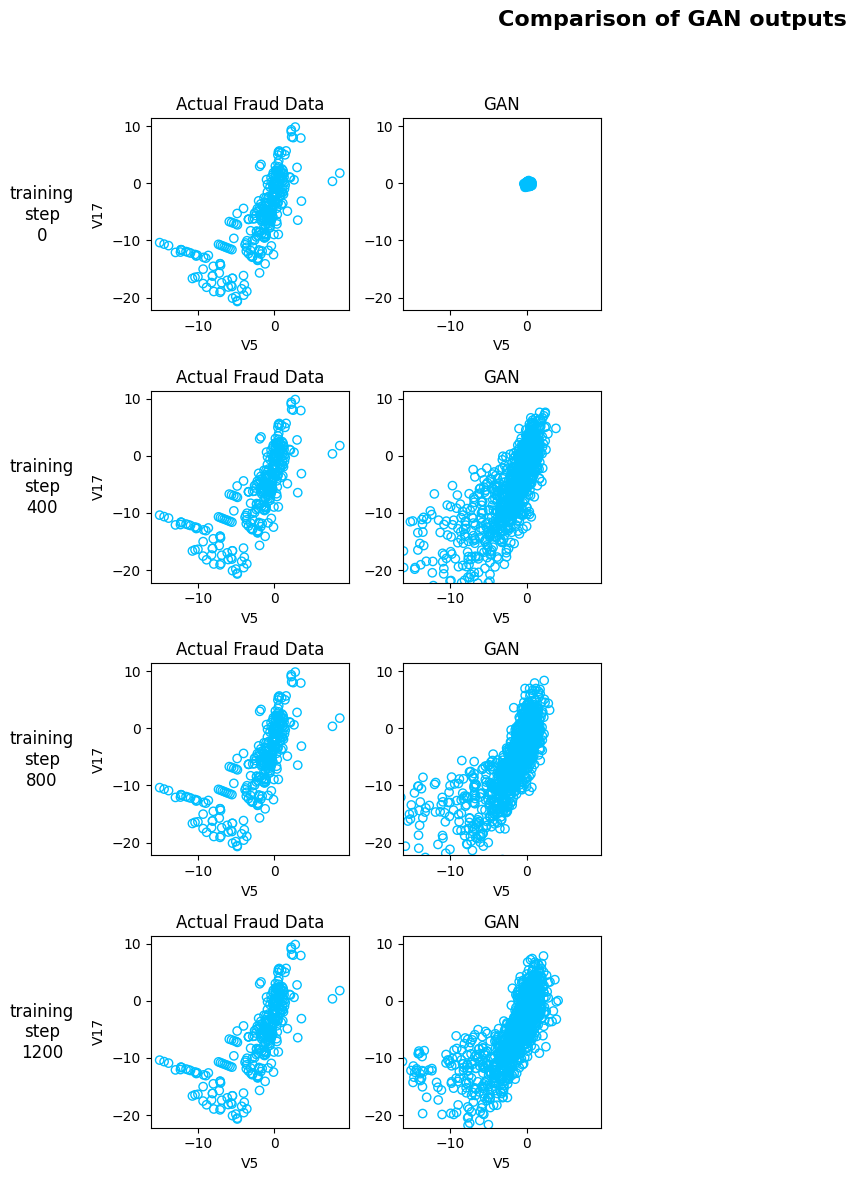

In [ ]:
# Setup parameters visualization parameters
seed = 42
test_size = train_samples.shape[0] # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(1024, noise_dim))
real = synthesizer.get_data_batch(train=train_samples, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
class_labels = ['Class 1','Class 2']

col1, col2 = 'V5', 'V17'

base_dir = 'cache/'

#Actual fraud data visualization
model_steps = [ 0, 400, 800, 1200]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)

    # for group, color, marker, label in zip(real_samples.groupby('Class'), colors, markers, class_labels ):
    plt.scatter(
        real_samples[[col1]], real_samples[[col2]],
        marker='o', edgecolors=['deepskyblue'], facecolors='none' )

    plt.title('Actual Fraud Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()

    # if model_step_ix == 0:
        # legend = plt.legend()
        # legend.get_frame().set_facecolor('white')

    for i, model_name in enumerate( model_names[:] ):

        [model_name, with_class, generator_model] = models[model_name]

        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

        if with_class:
            raise NotImplementedError()
            # g_z = generator_model.predict([z, labels])
            # gen_samples = pd.DataFrame(g_z, columns=data_cols)
            # for group, color, marker, label in zip( gen_samples.groupby('Class'), colors, markers, class_labels ):
            #     plt.scatter( group[1][[col1]], group[1][[col2]],
            #                      label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model.predict(z)
            gen_samples = pd.DataFrame(g_z, columns=data_cols)
            gen_samples.to_csv('Generated_sample.csv')
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]],
                         marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)
        plt.xlabel(col1)
        ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
import numpy as np
def evaluate(model, X, y, cutoff=None):
    # y_hat = model.predict(X)
    y_hat_prob = model.predict_proba(X)[:, 1]
    if cutoff:
        best_cutoff = cutoff
        best_f1 = f1_score(y, (y_hat_prob >= cutoff).astype('int'))
    else:
        best_f1, best_cutoff = 0, 0
        for cutoff in np.arange(0., 1, 0.01):
            y_hat = (y_hat_prob >= cutoff).astype('int')
            score = f1_score(y, y_hat)
            if score > best_f1:
                best_f1, best_cutoff = score, cutoff
    print(f"F1: {best_f1} @ {best_cutoff:.2f}")
    # print(f"Acc: {accuracy_score(y, y_hat)}")
    print(confusion_matrix(y, (y_hat_prob >= best_cutoff).astype('int')))

    print(f"AUC: {roc_auc_score(y, y_hat_prob)}")
    return best_cutoff

In [ ]:
model_params = dict(
    n_estimators=300, max_depth=8, max_leaf_nodes=2**6, class_weight="balanced_subsample"
)

In [ ]:
y_train.shape

(12295,)

In [ ]:
model = RandomForestClassifier(**model_params)
model.fit(X_train.values, y_train.values)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       max_leaf_nodes=64, n_estimators=300)

In [ ]:
cutoff = evaluate(model, X_valid.values, y_valid.values)

F1: 0.9111111111111111 @ 0.48
[[4000    0]
 [  16   82]]
AUC: 0.9782168367346938


In [ ]:
acc_test = evaluate(model, X_test.values, y_test.values, cutoff)

F1: 0.9206349206349207 @ 0.48
[[3997    3]
 [  12   87]]
AUC: 0.9793409090909092
